# Preliminary analysis of data 1.0

## Install packages

In [2]:
pip install pyalex

  Obtaining dependency information for pyalex from https://files.pythonhosted.org/packages/20/1c/3254fc4139143235d089bee15555e2829e254d45c1bf91fc64197b57a480/pyalex-0.11-py3-none-any.whl.metadata
  Using cached pyalex-0.11-py3-none-any.whl.metadata (12 kB)
Using cached pyalex-0.11-py3-none-any.whl (9.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gender-guesser

  Using cached gender_guesser-0.4.0-py2.py3-none-any.whl (379 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pycountry

  Using cached pycountry-22.3.5-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/af/7b/d170f9c8306c7673f57ca4f442e326d36e20299725edc5d0af36a3e3b041/pandas-2.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for numpy>=1.23.2 from https://files.pythonhosted.org/packages/35/21/9e150d654da358beb29fe216f339dc17f2b2ac13fff2a89669401a910550/numpy-1.26.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 3.3 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 42.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 M

In [8]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/af/f3/fb27b3b902fc759bbca3f9d0336c48069c3022e57552c4b0095d997c7ea8/matplotlib-3.8.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.8.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/2c/8e/656f8e7cd316aa68d9824744773e90dbd71f847429d10c82001e927480a2/contourpy-1.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached contourpy-1.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.9 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/49/ba/ebe5599a

In [10]:
pip install genderize

  Using cached Genderize-0.3.1-py3-none-any.whl (5.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [1102]:
pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
  Using cached plotly-5.17.0-py2.py3-none-any.whl.metadata (7.0 kB)
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 40.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


## Import packages

In [1582]:
#general
import pandas as pd 
from matplotlib import pyplot as plt
import json
import numpy as np
import warnings
np.random.seed(2222)

#for OpenAlex
import pyalex
from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
from itertools import chain

#for Gender Guesser
from urllib.request import urlopen
from genderize import Genderize
import gender_guesser.detector as gender
import pycountry
import re

#for Geopandas
import mapclassify
import geopandas

#for topic model
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.stem.porter import *

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

In [1528]:
warnings.simplefilter(action='ignore', category=FutureWarning)



## Import data

In [1529]:
pyalex.config.email = "ncz695@alumni.ku.dk"

In [419]:
%%time

physics_data=[]

query = Works().search_filter(abstract="physics") \
        .filter(type='article') \
        .filter(publication_year="2023")

for record in chain(*query.paginate(n_max=None)):
    physics_data.append(record)


CPU times: user 1min 14s, sys: 5.6 s, total: 1min 19s
Wall time: 14min 52s


In [1536]:
data=pd.DataFrame(physics_data)

In [1537]:
data.head(3)

""


In [1526]:
data.to_csv('18102023Data0.csv')

In [2184]:
data=pd.read_csv('OpenAlex Data/18102023Data0.csv')

In [1541]:
len(data)

30071

In [2185]:
data.head(3)

,Unnamed: 0,article_id,doi,title,display_name,relevance_score,publication_year,publication_date,ids,language,...,referenced_works_count,referenced_works,related_works,ngrams_url,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin
0,0,https://openalex.org/W4225725984,https://doi.org/10.1088/1361-6471/ac865e,The Forward Physics Facility at the High-Lumin...,The Forward Physics Facility at the High-Lumin...,147.29424,2023,2023-01-20,{'openalex': 'https://openalex.org/W4225725984...,en,...,1410,"['https://openalex.org/W9098236', 'https://ope...","['https://openalex.org/W1807381854', 'https://...",https://api.openalex.org/works/W4225725984/ngrams,"{'Abstract': [0], 'High': [1, 141], 'energy': ...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2023, 'cited_by_count': 26}, {'year'...",2023-10-13T08:25:57.384509,2022-05-05,NaN
1,1,https://openalex.org/W4322490984,https://doi.org/10.1016/j.physrep.2023.01.003,Advances in QED with intense background fields,Advances in QED with intense background fields,142.71542,2023,2023-04-01,{'openalex': 'https://openalex.org/W4322490984...,en,...,921,"['https://openalex.org/W51986920', 'https://op...","['https://openalex.org/W102187097', 'https://o...",https://api.openalex.org/works/W4322490984/ngrams,"{'Upcoming': [0], 'and': [1, 8, 50, 74, 79, 10...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2023, 'cited_by_count': 34}, {'year'...",2023-10-13T13:17:22.537402,2023-02-28,NaN
2,2,https://openalex.org/W4313491438,https://doi.org/10.1016/j.rinp.2022.106193,Physics of crystal lattices and plasma; analyt...,Physics of crystal lattices and plasma; analyt...,142.29727,2023,2023-01-01,{'openalex': 'https://openalex.org/W4313491438...,en,...,64,"['https://openalex.org/W1970496060', 'https://...","['https://openalex.org/W1982522977', 'https://...",https://api.openalex.org/works/W4313491438/ngrams,"{'In': [0], 'this': [1, 140], 'study,': [2], '...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2023, 'cited_by_count': 34}]",2023-10-05T08:52:40.033068,2023-01-06,NaN


## Organise data

In [423]:
data.rename(columns={'id': 'article_id'}, inplace=True)

In [424]:
data.columns

Index(['article_id', 'doi', 'title', 'display_name', 'relevance_score',
       'publication_year', 'publication_date', 'ids', 'language',
       'primary_location', 'type', 'type_crossref', 'open_access',
       'authorships', 'countries_distinct_count',
       'institutions_distinct_count', 'corresponding_author_ids',
       'corresponding_institution_ids', 'apc_list', 'apc_paid',
       'is_authors_truncated', 'has_fulltext', 'cited_by_count', 'biblio',
       'is_retracted', 'is_paratext', 'concepts', 'mesh', 'locations_count',
       'locations', 'best_oa_location', 'sustainable_development_goals',
       'grants', 'referenced_works_count', 'referenced_works', 'related_works',
       'ngrams_url', 'abstract_inverted_index', 'cited_by_api_url',
       'counts_by_year', 'updated_date', 'created_date', 'fulltext_origin'],
      dtype='object')

In [2186]:
primary_journal_location=data.primary_location.apply(pd.Series)

In [426]:
primary_journal_source=primary_journal_location.source.apply(pd.Series)

In [427]:
abstract=[]

for i in range(len(data)):
    abstract.append(physics_data[i]['abstract'])

## Article data

In [428]:
article_data=data[['article_id', 'doi', 'publication_year', 'publication_date', 'language', 'title', 'cited_by_count', 'countries_distinct_count', 'institutions_distinct_count']]

#also add
#institution country 
#article country 

In [429]:
article_data['abstract']=abstract

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_4107/3565299574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_data['abstract']=abstract


In [430]:
article_data['journal_id']=primary_journal_source['id']

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_4107/2024416592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_data['journal_id']=primary_journal_source['id']


In [431]:
article_data['journal_name']=primary_journal_source['display_name']


/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_4107/2625750207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_data['journal_name']=primary_journal_source['display_name']


In [934]:
total_author_counts=[]

for i in range(len(data)):
    total_author_counts.append(len(data.iloc[i]['authorships']))

article_data['total_author_counts']=total_author_counts

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_4107/3163159293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_data['total_author_counts']=total_author_counts


In [937]:
article_data=article_data.rename('article_{}'.format)

In [939]:
article_data.head(3)

,article_id,doi,publication_year,publication_date,language,title,cited_by_count,countries_distinct_count,institutions_distinct_count,abstract,journal_id,journal_name,total_author_counts
article_0,https://openalex.org/W4225725984,https://doi.org/10.1088/1361-6471/ac865e,2023,2023-01-20,en,The Forward Physics Facility at the High-Lumin...,28,27,163,Abstract High energy collisions at the High-Lu...,https://openalex.org/S78376336,Journal of Physics G,100
article_1,https://openalex.org/W4322490984,https://doi.org/10.1016/j.physrep.2023.01.003,2023,2023-04-01,en,Advances in QED with intense background fields,43,5,10,Upcoming and planned experiments combining inc...,https://openalex.org/S48633963,Physics Reports,7
article_2,https://openalex.org/W4313491438,https://doi.org/10.1016/j.rinp.2022.106193,2023,2023-01-01,en,Physics of crystal lattices and plasma; analyt...,34,2,2,"In this study, we use cutting-edge analytical ...",https://openalex.org/S2764941219,Results in Physics,1


## Author data

In [1003]:
author_data=data[['article_id', 'doi']]
author_data=author_data.rename('article_{}'.format)

### Extract authorships

In [435]:
authorships=data.authorships.apply(pd.Series)

In [436]:
authorships=authorships.add_prefix('author_position_')

In [437]:
authorships=authorships.rename('article_{}'.format)

### Extract author position and info

In [438]:
#get authorships for each author on each article

In [439]:
%%time
authorship_positions=[]

for i in range(len(authorships.columns)):
    authorship_positions.append(authorships.iloc[:,i].apply(pd.Series))

CPU times: user 4min 10s, sys: 4.67 s, total: 4min 15s
Wall time: 4min 17s


In [440]:
first_author=authorship_positions[0]

In [441]:
all_authors = pd.concat([authorship_positions[i] for i in range(len(authorship_positions))], axis=1)


In [442]:
# create unique identifier for each repeated column
identifier = all_authors.columns.to_series().groupby(level=0).transform('cumcount')

# rename columns with the new identifiers
all_authors.columns = all_authors.columns.astype('string') + identifier.astype('string')


## Extract author ID and name

In [444]:
%%time
all_authors_info = pd.concat([all_authors[f'author{i}'].apply(pd.Series) for i in range(len(authorship_positions))], axis=1)


CPU times: user 4min 11s, sys: 15.7 s, total: 4min 27s
Wall time: 4min 37s


In [445]:
all_authors_info.rename(columns={'id': 'author_id', 'display_name': 'author_name'}, inplace=True)

In [446]:
# create unique identifier for each repeated column
identifier = all_authors_info.columns.to_series().groupby(level=0).transform('cumcount')

# rename columns with the new identifiers
all_authors_info.columns = all_authors_info.columns.astype('string') + identifier.astype('string')


In [447]:
all_authors_infos=[]
for i in range(len(authorship_positions)):
    all_authors_infos.append(all_authors_info[[f'author_id{i}', f'author_name{i}']])

In [448]:
all_authors_infos = pd.concat([all_authors_infos[i].apply(pd.Series) for i in range(len(authorship_positions))], axis=1)


In [449]:
all_authors_infos=all_authors_infos.fillna(value='None')


In [450]:
all_authors_infos

,author_id0,author_name0,author_id1,author_name1,author_id2,author_name2,author_id3,author_name3,author_id4,author_name4,...,author_id95,author_name95,author_id96,author_name96,author_id97,author_name97,author_id98,author_name98,author_id99,author_name99
article_0,https://openalex.org/A5010493054,Jonathan L. Feng,https://openalex.org/A5086121104,Felix Kling,https://openalex.org/A5081913495,Mary Hall Reno,https://openalex.org/A5009041224,Juan Rojo,https://openalex.org/A5070202914,D. Soldin,...,https://openalex.org/A5087844903,Marco Guzzi,https://openalex.org/A5057863257,A. Haas,https://openalex.org/A5082826188,Timo Hakulinen,https://openalex.org/A5055893253,Steven P. Harris,https://openalex.org/A5087716243,Julia Harz
article_1,https://openalex.org/A5013958581,A. M. Fedotov,https://openalex.org/A5012104033,Anton Ilderton,https://openalex.org/A5070854974,Felix Karbstein,https://openalex.org/A5015051661,B. King,https://openalex.org/A5052040671,D. Seipt,...,None,None,None,None,None,None,None,None,None,None
article_2,https://openalex.org/A5026698321,Mostafa M. A. Khater,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_3,https://openalex.org/A5025336947,Jie Zhang,https://openalex.org/A5002765737,Yihui Zhao,https://openalex.org/A5068976960,Fergus Shone,https://openalex.org/A5024394762,Zhenghong Li,https://openalex.org/A5049192404,Alejandro F. Frangi,...,None,None,None,None,None,None,None,None,None,None
article_4,https://openalex.org/A5037547411,Nobuyuki Okuma,https://openalex.org/A5075726145,Masatoshi Sato,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
article_30066,https://openalex.org/A5068609653,A. Burov,https://openalex.org/A5081510189,L. A. Burov,https://openalex.org/A5048516315,Irina A. Rybakova,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30067,https://openalex.org/A5019395073,D. G. Egorov,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30068,https://openalex.org/A5010432361,T. Nakata,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30069,https://openalex.org/A5020712830,Daiki Nishiguchi,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Extract author country 

In [706]:
%%time
all_authors_countries = pd.concat([all_authors[f'countries{i}'].apply(pd.Series) for i in range(len(authorship_positions))], axis=1)


CPU times: user 1min 52s, sys: 35 s, total: 2min 27s
Wall time: 3min 14s


In [760]:
#authors_first_country
all_authors_first_countries=all_authors_countries[0]

In [761]:
all_authors_first_countries

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
article_0,US,DE,US,NL,US,US,CH,US,GB,CH,...,BR,NaN,IN,CH,DE,US,US,CH,US,DE
article_1,RU,GB,DE,GB,DE,JP,DE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_2,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_3,GB,GB,GB,GB,BE,GB,GB,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_4,JP,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
article_30066,NaN,NaN,RU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_30067,RU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_30068,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_30069,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [762]:
# create unique identifier for each repeated column
identifier = all_authors_first_countries.columns.to_series().groupby(level=0).transform('cumcount')

# rename columns with the new identifiers
all_authors_first_countries.columns = 'author'+identifier.astype('string')+ 'country'+all_authors_first_countries.columns.astype('string')


In [763]:
#we need a way to replace NaN in case there is no author with None and Nan in case there is an author but no country with Unknown
all_authors_first_countries

,author0country0,author1country0,author2country0,author3country0,author4country0,author5country0,author6country0,author7country0,author8country0,author9country0,...,author90country0,author91country0,author92country0,author93country0,author94country0,author95country0,author96country0,author97country0,author98country0,author99country0
article_0,US,DE,US,NL,US,US,CH,US,GB,CH,...,BR,NaN,IN,CH,DE,US,US,CH,US,DE
article_1,RU,GB,DE,GB,DE,JP,DE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_2,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_3,GB,GB,GB,GB,BE,GB,GB,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_4,JP,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
article_30066,NaN,NaN,RU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_30067,RU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_30068,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_30069,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [787]:
%%time

#try if we can save with None values so we can recognise them from Unknown values 

all_authors_first_countries_final=[]

for i, j in zip((x for _ in repetitions for x in article_iter), author_iter):
    if all_authors_infos.iloc[i][f'author_name{j}'] != 'None':
        all_authors_first_countries_final.append(all_authors_first_countries[f'author{j}country0'][i])
    else:
        all_authors_first_countries_final.append('None')
    

CPU times: user 3min 10s, sys: 6.49 s, total: 3min 16s
Wall time: 3min 12s


In [788]:
all_authors_first_countries_final=pd.DataFrame(np.array(all_authors_first_countries_final).reshape(-1,len(article_iter))).T

In [789]:
all_authors_first_countries_final=all_authors_first_countries_final.replace({'nan':'Unknown'})

In [790]:
# create unique identifier for each repeated column
identifier = all_authors_first_countries_final.columns.to_series().groupby(level=0).transform('cumcount')

# rename columns with the new identifiers
all_authors_first_countries_final.columns = 'author'+all_authors_first_countries_final.columns.astype('string')+'country'+identifier.astype('string')

In [791]:
all_authors_first_countries_final=all_authors_first_countries_final.rename('article_{}'.format)

In [792]:
all_authors_first_countries_final

,author0country0,author1country0,author2country0,author3country0,author4country0,author5country0,author6country0,author7country0,author8country0,author9country0,...,author90country0,author91country0,author92country0,author93country0,author94country0,author95country0,author96country0,author97country0,author98country0,author99country0
article_0,US,DE,US,NL,US,US,CH,US,GB,CH,...,BR,Unknown,IN,CH,DE,US,US,CH,US,DE
article_1,RU,GB,DE,GB,DE,JP,DE,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_2,CN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_3,GB,GB,GB,GB,BE,GB,GB,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_4,JP,JP,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
article_30066,Unknown,Unknown,RU,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30067,RU,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30068,JP,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30069,JP,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Get author gender

In [556]:
%%time
article_len=np.arange(0, len(all_authors_infos), 1)
article_iter=article_len.tolist()
author_reps=len(authorship_positions)
author_iter=np.concatenate([([i]*len(article_len)) for i in range(len(authorship_positions))], axis=0)
repetitions=range(len(authorship_positions))


CPU times: user 111 ms, sys: 13.6 ms, total: 124 ms
Wall time: 124 ms


In [612]:
%%time

#try if we can save with None values so we can recognise them from Unknown values 

all_authors_surname=[]

for i, j in zip((x for _ in repetitions for x in article_iter), author_iter):
    if all_authors_infos.iloc[i][f'author_name{j}'] != 'None':
        all_authors_surname.append(all_authors_infos.iloc[i][f'author_name{j}'].split()[0])
    else:
        all_authors_surname.append('None')
    

CPU times: user 3min 16s, sys: 7.38 s, total: 3min 24s
Wall time: 3min 19s


In [615]:
all_authors_surnames=pd.DataFrame(np.array(all_authors_surname).reshape(-1,len(article_iter))).T

In [616]:
all_authors_surnames

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,Jonathan,Felix,Mary,Juan,D.,Luis,J.,Ahmed,Lucian,Kevin,...,V.,D.,Srubabati,Silvia,J.,Marco,A.,Timo,Steven,Julia
1,A.,Anton,Felix,B.,D.,Hidetoshi,Greger,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Mostafa,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Jie,Yihui,Fergus,Zhenghong,Alejandro,Shane,Zhiqiang,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Nobuyuki,Masatoshi,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30066,A.,L.,Irina,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
30067,D.,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
30068,T.,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
30069,Daiki,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [617]:
all_authors_surnames=all_authors_surnames.add_prefix('first_name_author_position_')
all_authors_surnames=all_authors_surnames.rename('article_{}'.format)

In [618]:
all_authors_surnames.head(2)

,first_name_author_position_0,first_name_author_position_1,first_name_author_position_2,first_name_author_position_3,first_name_author_position_4,first_name_author_position_5,first_name_author_position_6,first_name_author_position_7,first_name_author_position_8,first_name_author_position_9,...,first_name_author_position_90,first_name_author_position_91,first_name_author_position_92,first_name_author_position_93,first_name_author_position_94,first_name_author_position_95,first_name_author_position_96,first_name_author_position_97,first_name_author_position_98,first_name_author_position_99
article_0,Jonathan,Felix,Mary,Juan,D.,Luis,J.,Ahmed,Lucian,Kevin,...,V.,D.,Srubabati,Silvia,J.,Marco,A.,Timo,Steven,Julia
article_1,A.,Anton,Felix,B.,D.,Hidetoshi,Greger,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [461]:
#determine gender by name only 

In [619]:
detector=gender.Detector(case_sensitive=False)

In [621]:
%%time

all_authors_gender=[]

for i, j in zip((x for _ in repetitions for x in article_iter), author_iter):
    if all_authors_surnames[f'first_name_author_position_{j}'][i] != 'None':
        all_authors_gender.append(detector.get_gender(all_authors_surnames[f'first_name_author_position_{j}'][i]))
    else:
        all_authors_gender.append('None')

CPU times: user 14.1 s, sys: 78.5 ms, total: 14.2 s
Wall time: 14.2 s


In [622]:
all_authors_gender=pd.DataFrame(np.array(all_authors_gender).reshape(-1,len(article_iter))).T

In [623]:
all_authors_gender=all_authors_gender.add_prefix('gender_author_position_')
all_authors_gender=all_authors_gender.rename('article_{}'.format)

In [624]:
all_authors_gender

,gender_author_position_0,gender_author_position_1,gender_author_position_2,gender_author_position_3,gender_author_position_4,gender_author_position_5,gender_author_position_6,gender_author_position_7,gender_author_position_8,gender_author_position_9,...,gender_author_position_90,gender_author_position_91,gender_author_position_92,gender_author_position_93,gender_author_position_94,gender_author_position_95,gender_author_position_96,gender_author_position_97,gender_author_position_98,gender_author_position_99
article_0,male,male,mostly_female,male,unknown,male,unknown,male,male,male,...,unknown,unknown,unknown,female,unknown,male,unknown,male,male,female
article_1,unknown,male,male,unknown,unknown,male,male,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_2,male,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_3,andy,andy,male,andy,male,male,andy,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_4,male,male,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
article_30066,unknown,unknown,female,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30067,unknown,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30068,unknown,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30069,male,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [625]:
#now get gender based on name as country as well to increase accuracy 

In [626]:
#translate country into name that is readible for gender guesser 

In [793]:
countries = {}

#loops over all of the countries contained in the pycountry library and populates dictionary
for country in pycountry.countries:
    countries[country.alpha_2] = country.name

In [ ]:
#rename all of these to _list so that we can easily count ALL countries/genders all together? 

In [797]:
%%time

all_authors_countries_name=[]

for i, j in zip((x for _ in repetitions for x in article_iter), author_iter):
    if all_authors_first_countries_final[f'author{j}country0'][i] in countries.keys():
        all_authors_countries_name.append(countries.get(all_authors_first_countries_final[f'author{j}country0'][i]).lower())
    elif all_authors_first_countries_final[f'author{j}country0'][i] == 'Unknown':
        all_authors_countries_name.append('Unknown')
    elif all_authors_first_countries_final[f'author{j}country0'][i] == 'None':
        all_authors_countries_name.append('None')
    else:
        all_authors_countries_name.append('other_countries')

CPU times: user 39.2 s, sys: 171 ms, total: 39.3 s
Wall time: 39.3 s


In [803]:
all_authors_countries_name=pd.DataFrame(np.array(all_authors_countries_name).reshape(-1,len(article_iter))).T

In [804]:
all_authors_countries_name=all_authors_countries_name.add_prefix('countryname_author_position_')
all_authors_countries_name=all_authors_countries_name.rename('article_{}'.format)

In [805]:
all_authors_countries_name

,countryname_author_position_0,countryname_author_position_1,countryname_author_position_2,countryname_author_position_3,countryname_author_position_4,countryname_author_position_5,countryname_author_position_6,countryname_author_position_7,countryname_author_position_8,countryname_author_position_9,...,countryname_author_position_90,countryname_author_position_91,countryname_author_position_92,countryname_author_position_93,countryname_author_position_94,countryname_author_position_95,countryname_author_position_96,countryname_author_position_97,countryname_author_position_98,countryname_author_position_99
article_0,united states,germany,united states,netherlands,united states,united states,switzerland,united states,united kingdom,switzerland,...,brazil,Unknown,india,switzerland,germany,united states,united states,switzerland,united states,germany
article_1,russian federation,united kingdom,germany,united kingdom,germany,japan,germany,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_2,china,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_3,united kingdom,united kingdom,united kingdom,united kingdom,belgium,united kingdom,united kingdom,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_4,japan,japan,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
article_30066,Unknown,Unknown,russian federation,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30067,russian federation,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30068,japan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30069,japan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [879]:
# Define a dictionary of replacement mappings
replacement_dict = {
    'united states': 'usa',
    'united kingdom': 'great_britain',
    'russian federation': 'russia',
    'netherlands': 'the_netherlands',
    'canada': 'other_countries',
    'saudi arabia': 'arabia',
    'egypt': 'other_countries',
    'australia': 'other_countries',
    'morocco': 'other_countries',
    'united arab emirates': 'other_countries',
    'singapore': 'other_countries',
    'switzerland': 'swiss',
    'pakistan': 'the_stans',
    'kazakhstan': 'the_stans', 
    'kyrgyzstan': 'the_stans',
    'afghanistan': 'the_stans',
    'tajikistan': 'the_stans',
    'iran, islamic republic of': 'other_countries',
    'indonesia': 'other_countries', 
    'korea, republic of': 'korea', 
    'bangladesh': 'other_countries', 
    'south africa': 'other_countries',
    'hong kong': 'other_countries', 
    'malaysia': 'other_countries', 
    'jordan': 'other_countries', 
    'taiwan, province of china': 'china', 
    'czechia': 'czech_republic', 
    'viet nam': 'vietnam', 
    'nigeria': 'other_countries', 
    'argentina': 'other_countries', 
    'algeria': 'other_countries',
    'bosnia and herzegovina': 'bosniaand', 
    'north macedonia': 'macedonia',
    'philippines': 'other_countries', 
    'tunisia': 'other_countries', 
    'new zealand': 'other_countries', 
    'kuwait': 'other_countries', 
    'uzbekistan': 'other_countries', 
    'rwanda': 'other_countries', 
    'ethiopia': 'other_countries', 
    'ecuador': 'other_countries', 
    'peru': 'other_countries', 
    'ghana': 'other_countries', 
    'kenya': 'other_countries', 
    'lebanon': 'other_countries', 
    'cyprus': 'other_countries', 
    'uruguay': 'other_countries', 
    'sri lanka': 'other_countries', 
    'sudan': 'other_countries', 
    'nepal': 'other_countries', 
    'senegal': 'other_countries', 
    'mongolia': 'other_countries', 
    'qatar': 'other_countries', 
    'mali': 'other_countries', 
    'cameroon': 'other_countries', 
    'panama': 'other_countries',
    'bhutan': 'other_countries', 
    'bahrain': 'other_countries', 
    'tanzania, united republic of': 'other_countries', 
    'costa rica': 'other_countries', 
    'libya': 'other_countries', 
    'zambia': 'other_countries', 
    'lesotho': 'other_countries', 
    'gambia': 'other_countries', 
    'paraguay': 'other_countries', 
    'myanmar': 'other_countries', 
    'zimbabwe': 'other_countries',
    'uganda': 'other_countries', 
    'venezuela, bolivarian republic of': 'other_countries',
    'botswana': 'other_countries', 
    'mauritius': 'other_countries', 
    'mozambique': 'other_countries', 
    'congo, the democratic republic of the': 'other_countries', 
    'cuba': 'other_countries',
    'réunion': 'other_countries', 
    'macao': 'other_countries', 
    'yemen': 'other_countries',
    'iraq': 'other_countries',
    'thailand': 'other_countries', 
    'brazil': 'other_countries', 
    'colombia': 'other_countries', 
    'chile': 'other_countries', 
    'mexico': 'other_countries',
    'oman': 'other_countries',
    'benin': 'other_countries',
    'new caledonia': 'other_countries',
    'burkina faso': 'other_countries',
    'malawi': 'other_countries',
    'burundi': 'other_countries',
    'puerto rico': 'other_countries',
    'honduras': 'other_countries',
    'niger': 'other_countries',
    'trinidad and tobago': 'other_countries',
    'nicaragua': 'other_countries',
    'bermuda': 'other_countries'}

In [880]:
for i in range(author_reps):
    column_name = f'countryname_author_position_{i}'
    all_authors_countries_name[column_name] = all_authors_countries_name[column_name].str.lower()
    all_authors_countries_name[column_name] = all_authors_countries_name[column_name].replace(replacement_dict)

In [877]:
all_authors_countries_name.head(5)

,countryname_author_position_0,countryname_author_position_1,countryname_author_position_2,countryname_author_position_3,countryname_author_position_4,countryname_author_position_5,countryname_author_position_6,countryname_author_position_7,countryname_author_position_8,countryname_author_position_9,...,countryname_author_position_90,countryname_author_position_91,countryname_author_position_92,countryname_author_position_93,countryname_author_position_94,countryname_author_position_95,countryname_author_position_96,countryname_author_position_97,countryname_author_position_98,countryname_author_position_99
article_0,usa,germany,usa,the_netherlands,usa,usa,swiss,usa,great_britain,swiss,...,other_countries,unknown,india,swiss,germany,usa,usa,swiss,usa,germany
article_1,russia,great_britain,germany,great_britain,germany,japan,germany,none,none,none,...,none,none,none,none,none,none,none,none,none,none
article_2,china,none,none,none,none,none,none,none,none,none,...,none,none,none,none,none,none,none,none,none,none
article_3,great_britain,great_britain,great_britain,great_britain,belgium,great_britain,great_britain,none,none,none,...,none,none,none,none,none,none,none,none,none,none
article_4,japan,japan,none,none,none,none,none,none,none,none,...,none,none,none,none,none,none,none,none,none,none


In [872]:
#now get gender with both name and country if avaialabe. If only name available get that.
#if no author on position then just append "none" 

In [881]:
%%time

all_authors_gender_final=[]

for i, j in zip((x for _ in repetitions for x in article_iter), author_iter):
    if all_authors_countries_name[f'countryname_author_position_{j}'][i] == 'unknown':
        all_authors_gender_final.append(detector.get_gender(all_authors_surnames[f'first_name_author_position_{j}'][i]))
    elif all_authors_countries_name[f'countryname_author_position_{j}'][i] != 'unknown' and all_authors_countries_name[f'countryname_author_position_{j}'][i] != 'none':
        all_authors_gender_final.append(detector.get_gender(all_authors_surnames[f'first_name_author_position_{j}'][i], all_authors_countries_name[f'countryname_author_position_{j}'][i]))
    else:
        all_authors_gender_final.append('None')

CPU times: user 39.9 s, sys: 168 ms, total: 40 s
Wall time: 40.1 s


In [882]:
all_authors_gender_final=pd.DataFrame(np.array(all_authors_gender_final).reshape(-1,len(article_iter))).T

In [883]:
all_authors_gender_final=all_authors_gender_final.add_prefix('gender_author_position_')
all_authors_gender_final=all_authors_gender_final.rename('article_{}'.format)

In [884]:
all_authors_gender_final

,gender_author_position_0,gender_author_position_1,gender_author_position_2,gender_author_position_3,gender_author_position_4,gender_author_position_5,gender_author_position_6,gender_author_position_7,gender_author_position_8,gender_author_position_9,...,gender_author_position_90,gender_author_position_91,gender_author_position_92,gender_author_position_93,gender_author_position_94,gender_author_position_95,gender_author_position_96,gender_author_position_97,gender_author_position_98,gender_author_position_99
article_0,male,male,mostly_female,andy,unknown,male,unknown,andy,andy,male,...,unknown,unknown,unknown,female,unknown,andy,unknown,male,male,female
article_1,unknown,andy,male,unknown,unknown,male,andy,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_2,andy,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_3,andy,andy,male,andy,andy,male,andy,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_4,male,male,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
article_30066,unknown,unknown,female,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30067,unknown,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30068,unknown,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_30069,male,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
#remember: None means that there is no author on that position and unknown means that the gender could not be found based on name/country 

In [ ]:
#count all genders and all countries 

In [ ]:
#count genders 
all_authors_gender_article=all_authors_gender_final.T

In [1096]:
%%time
all_authors_gender_article_count=pd.DataFrame([all_authors_gender_article[f'article_{i}'].value_counts() for i in range(len(article_iter))])


CPU times: user 3.62 s, sys: 4.73 s, total: 8.36 s
Wall time: 36.8 s


In [1098]:
all_authors_gender_article_count.index=[f'article_{i}' for i in range(len(article_iter))]

In [1126]:
all_authors_gender_article_count=all_authors_gender_article_count.fillna(value=0)

In [1141]:
all_authors_gender_article_count

,unknown,male,andy,female,mostly_female,mostly_male,None
article_0,43.0,30.0,20.0,4.0,2.0,1.0,0.0
article_1,3.0,2.0,2.0,0.0,0.0,0.0,93.0
article_2,0.0,0.0,1.0,0.0,0.0,0.0,99.0
article_3,0.0,2.0,5.0,0.0,0.0,0.0,93.0
article_4,0.0,2.0,0.0,0.0,0.0,0.0,98.0
...,...,...,...,...,...,...,...
article_30066,2.0,0.0,0.0,1.0,0.0,0.0,97.0
article_30067,1.0,0.0,0.0,0.0,0.0,0.0,99.0
article_30068,1.0,0.0,0.0,0.0,0.0,0.0,99.0
article_30069,0.0,1.0,0.0,0.0,0.0,0.0,99.0


In [1197]:
#count countries per article 
all_authors_first_countries_article=all_authors_first_countries_final.T

In [1203]:
%%time
all_authors_first_countries_article_count=pd.DataFrame([all_authors_first_countries_article[f'article_{i}'].value_counts() for i in range(len(article_iter))])


CPU times: user 4.74 s, sys: 6.68 s, total: 11.4 s
Wall time: 38.6 s


In [1200]:
all_authors_first_countries_article_count.index=[f'article_{i}' for i in range(len(article_iter))]

In [1201]:
all_authors_first_countries_article_count=all_authors_first_countries_article_count.fillna(value=0)

In [1360]:
all_authors_first_countries_article_count.head(3)

,US,CH,DE,GB,IT,JP,CA,BR,NL,CN,...,CR,ME,LS,CM,NI,TZ,TT,GT,LY,GM
count,27.0,16.0,12.0,7.0,5.0,4.0,3.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,NaN,NaN,3.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1206]:
#count countries in total
all_authors_first_countries_article_countsum=all_authors_first_countries_article_count.sum().reset_index()

In [1211]:
all_authors_first_countries_article_countsum.columns=['contrycode2', 'countrycount']

In [1361]:
all_authors_first_countries_article_countsum.head(3)

,contrycode2,countrycount,CODE
0,US,20948.0,USA
1,CH,1773.0,CHE
2,DE,5174.0,DEU


## Remove None/Unknown and Andy from analysis

In [2201]:
#save only female and male
all_authors_gender_final_clean=all_authors_gender_final[all_authors_gender_final.isin(['male', 'mostly_male', 'female', 'mostly_female'])]

In [2202]:
#combine mostly female and mostly male to one 
all_authors_gender_final_clean=all_authors_gender_final_clean.replace('mostly_male', 'male')
all_authors_gender_final_clean=all_authors_gender_final_clean.replace('mostly_female', 'female')


In [2217]:
all_authors_gender_final_clean.head(3)

,gender_author_position_0,gender_author_position_1,gender_author_position_2,gender_author_position_3,gender_author_position_4,gender_author_position_5,gender_author_position_6,gender_author_position_7,gender_author_position_8,gender_author_position_9,...,gender_author_position_90,gender_author_position_91,gender_author_position_92,gender_author_position_93,gender_author_position_94,gender_author_position_95,gender_author_position_96,gender_author_position_97,gender_author_position_98,gender_author_position_99
article_0,male,male,female,NaN,NaN,male,NaN,NaN,NaN,male,...,NaN,NaN,NaN,female,NaN,NaN,NaN,male,male,female
article_1,NaN,NaN,male,NaN,NaN,male,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2203]:
#count genders 
all_authors_gender_article_clean=all_authors_gender_final_clean.T

In [2204]:
%%time
all_authors_gender_article_count_clean=pd.DataFrame([all_authors_gender_article_clean[f'article_{i}'].value_counts() for i in range(len(article_iter))])


CPU times: user 14.7 s, sys: 22.5 s, total: 37.2 s
Wall time: 4min 15s


In [2205]:
all_authors_gender_article_count_clean.index=[f'article_{i}' for i in range(len(article_iter))]

In [2206]:
all_authors_gender_article_count_clean=all_authors_gender_article_count_clean.fillna(value=0)

In [2207]:
all_authors_gender_article_count_clean

,male,female
article_0,31.0,6.0
article_1,2.0,0.0
article_2,0.0,0.0
article_3,2.0,0.0
article_4,2.0,0.0
...,...,...
article_30066,0.0,1.0
article_30067,0.0,0.0
article_30068,0.0,0.0
article_30069,1.0,0.0


In [2266]:
#get country etc based on the clean dataframe 

In [2299]:
all_authors_countries_gender_clean = all_authors_first_countries_final
#rename so that the country dataframe has the same column name as the gender one 
all_authors_countries_gender_clean = all_authors_countries_gender_clean.rename(columns=dict(zip(all_authors_countries_gender_clean.columns, all_authors_gender_final_clean.columns)))


In [2300]:
# Iterate through the DataFrames and replace values in new_country_df
for index, row in all_authors_gender_final_clean.iterrows():
    for col in all_authors_gender_final_clean.columns:
        if pd.isna(row[col]):
            all_authors_countries_gender_clean.at[index, col] = all_authors_gender_final_clean.at[index, col]


In [2301]:
all_authors_countries_gender_clean

,gender_author_position_0,gender_author_position_1,gender_author_position_2,gender_author_position_3,gender_author_position_4,gender_author_position_5,gender_author_position_6,gender_author_position_7,gender_author_position_8,gender_author_position_9,...,gender_author_position_90,gender_author_position_91,gender_author_position_92,gender_author_position_93,gender_author_position_94,gender_author_position_95,gender_author_position_96,gender_author_position_97,gender_author_position_98,gender_author_position_99
article_0,US,DE,US,NaN,NaN,US,NaN,NaN,NaN,CH,...,NaN,NaN,NaN,CH,NaN,NaN,NaN,CH,US,DE
article_1,NaN,NaN,DE,NaN,NaN,JP,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_3,NaN,NaN,GB,NaN,NaN,GB,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_4,JP,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
article_30066,NaN,NaN,RU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_30067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_30068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_30069,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2302]:
#count clean countries 
all_authors_countries_article_clean=all_authors_countries_gender_clean.T

In [2303]:
%%time
all_authors_countries_article_count_clean=pd.DataFrame([all_authors_countries_article_clean[f'article_{i}'].value_counts() for i in range(len(article_iter))])


CPU times: user 11.8 s, sys: 618 ms, total: 12.4 s
Wall time: 13.9 s


In [2304]:
all_authors_countries_article_count_clean.index=[f'article_{i}' for i in range(len(article_iter))]

In [2305]:
all_authors_countries_article_count_clean=all_authors_countries_article_count_clean.fillna(value=0)

In [2306]:
all_authors_countries_article_count_clean

,US,CH,GB,DE,IT,JP,ES,PL,FR,NL,...,TJ,KZ,GE,BA,KG,AM,BY,MK,ME,AL
article_0,11.0,7.0,4.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
article_1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
article_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
article_3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
article_4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
article_30066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
article_30067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
article_30068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
article_30069,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Extract author institutions

In [ ]:
#lad os vente og se om vi får brug for institutions 

In [898]:
#institution(0) is first institution and [3] is author count  
#all_authors[f'institutions{0}'][3]

[{'id': 'https://openalex.org/I130828816',
  'display_name': 'University of Leeds',
  'ror': 'https://ror.org/024mrxd33',
  'country_code': 'GB',
  'type': 'education',
  'lineage': ['https://openalex.org/I130828816']}]

## Topic Model

In [1543]:
article_data['abstract']

article_0        Abstract High energy collisions at the High-Lu...
article_1        Upcoming and planned experiments combining inc...
article_2        In this study, we use cutting-edge analytical ...
article_3        Musculoskeletal models have been widely used f...
article_4        The past decades have witnessed an explosion o...
                                       ...                        
article_30066    The creators of physics sought to construct it...
article_30067    It is shown that the problem of the source and...
article_30068    The aerodynamics of insect flight is a subject...
article_30069    Emergent order resulting from spontaneous symm...
article_30070    We experience a flow of time in everyday life....
Name: abstract, Length: 30071, dtype: object

### Latent Dirichlet Allocation
Data preprocessing follows five steps: 

1) Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
2) Words that have fewer than 3 characters are removed.
3) All stopwords are removed.
4) Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
5) Words are stemmed — words are reduced to their root form.

In [1553]:
article_data['abstract'][10]

"This study aims to determine the relationship between teacher teaching skills and students' interest in learning physics at senior high school 2 Batanghari. The method used is the quantitative method, the type of research used is correlational, the sample in this study is teachers and students of senior high school 2 Batanghari, the instrument used is a questionnaire, and the data analysis technique is descriptive and inferential statistics. The results of this study indicate that the teaching skills of physics teachers and the learning interests of physics students have a significant relationship."

In [1554]:
text_data= article_data['abstract']  #to extract the headline_text column and give it the variable name data
text_data

article_0        Abstract High energy collisions at the High-Lu...
article_1        Upcoming and planned experiments combining inc...
article_2        In this study, we use cutting-edge analytical ...
article_3        Musculoskeletal models have been widely used f...
article_4        The past decades have witnessed an explosion o...
                                       ...                        
article_30066    The creators of physics sought to construct it...
article_30067    It is shown that the problem of the source and...
article_30068    The aerodynamics of insect flight is a subject...
article_30069    Emergent order resulting from spontaneous symm...
article_30070    We experience a flow of time in everyday life....
Name: abstract, Length: 30071, dtype: object

#### Method 1

In [1546]:
# lemmatization and removing stopwords

#downloading dependencies
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

#function to lemmatize and remove stopwords from the text data
def preprocess(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words


#applying the function to the dataset
processed_data = text_data.apply(preprocess)
processed_data

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/signebendsen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/signebendsen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/signebendsen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


article_0        [abstract, high, energy, collision, high-lumin...
article_1        [upcoming, planned, experiment, combining, inc...
article_2        [study, ,, use, cutting-edge, analytical, nume...
article_3        [musculoskeletal, model, widely, used, detaile...
article_4        [past, decade, witnessed, explosion, interest,...
                                       ...                        
article_30066    [creator, physic, sought, construct, like, euc...
article_30067    [shown, problem, source, essence, morality, sa...
article_30068    [aerodynamics, insect, flight, subject, consid...
article_30069    [emergent, order, resulting, spontaneous, symm...
article_30070    [experience, flow, time, everyday, life, ., ho...
Name: abstract, Length: 30071, dtype: object

In [1548]:
# Create a dictionary from the preprocessed data
dictionary = Dictionary(processed_data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in processed_data]

# Train the LDA model
num_topics = 20 #select how many topics we want - play around with this 
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['object', '160', 'motion', 'video', 'local', 'point', 'ii', 'string', 'virtual', 'vertex']
Topic: 1
Words: ['student', 'learning', 'study', 'research', 'result', 'education', '%', 'used', 'using', 'school']
Topic: 2
Words: ["''", '``', 'reservoir', 'rock', 'well', 'http', 'permeability', 'seismic', 'oil', '//www.w3.org/1999/xlink']
Topic: 3
Words: ['cell', '%', '2', 'molecular', 'hydrogen', 'energy', 'chemical', '=', 'structure', '1']
Topic: 4
Words: ['equation', 'method', 'problem', 'solution', 'function', 'model', 'field', 'system', 'nonlinear', 'approach']
Topic: 5
Words: ['’', '”', '“', 'time', "'s", 'theory', 'one', ':', 'physical', 'work']
Topic: 6
Words: ['model', 'data', 'method', 'network', 'learning', 'approach', 'neural', 'proposed', 'accuracy', 'using']
Topic: 7
Words: [';', '&', 'amp', 'lt', 'gt', '#', ':', 'search', 'vol', 'span']
Topic: 8
Words: ['material', 'thermal', 'model', 'heat', 'process', 'temperature', 'study', 'property', 'effect', 'characteris

#### Method 2

In [1566]:
text_data=text_data.reset_index()

In [1567]:
documents = text_data

In [1576]:
stemmer = PorterStemmer()

In [1577]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [1579]:
doc_sample = documents[documents['index'] == 'article_4310'].values[0][1]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['In', 'the', 'gravitational', 'wave', 'event', 'GW170817,', 'there', 'was', 'a', '$\\sim', '10$', 'hours', 'gap', 'before', 'electromagnetic', '(EM)', 'observations,', 'without', 'detection', 'of', 'the', 'cocoon.', 'The', 'cocoon', 'is', 'heated', 'by', 'a', '\\textit{short}', 'gamma-ray', 'burst', '(\\textit{s}GRB)', 'jet', 'propagating', 'through', 'the', 'ejecta', 'of', 'a', 'Neutron', 'Star', '(NS)', 'merger,', 'and', 'a', 'part', 'of', 'the', 'cocoon', 'escapes', 'the', 'ejecta', 'with', 'an', 'opening', 'angle', 'of', '$20^{\\circ}$--$30^{\\circ}$.', 'Here', 'we', 'model', 'the', 'cocoon', 'and', 'calculate', 'its', 'EM', 'emission.', 'Our', '2D', 'hydrodynamic', 'simulations', 'suggest', 'that', 'the', 'density', 'and', 'energy', 'distributions,', 'after', 'entering', 'homologous', 'expansion,', 'are', 'well-fitted', 'with', 'power-law', 'functions,', 'in', 'each', 'of', 'the', 'relativistic', 'and', 'non-relativistic', 'parts', 'of', 'the', 'escaped', 'coc

In [1581]:
processed_docs = documents['abstract'].map(preprocess)
processed_docs[:10]

0    [abstract, high, energi, collis, high, luminos...
1    [upcom, plan, experi, combin, increasingli, in...
2    [studi, cut, edg, analyt, numer, approach, gil...
3    [musculoskelet, model, wide, detail, biomechan...
4    [past, decad, wit, explos, topolog, materi, ma...
5    [horizon, scale, imag, black, hole, shadow, op...
6    [articl, present, interact, multipl, model, sh...
7    [pioneer, work, landau, zener, uckelberg, majo...
8    [programm, radio, environ, parametr, reconfigu...
9    [lignin, employ, precursor, synthes, activ, ca...
Name: abstract, dtype: object

In [1583]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abstract
1 accept
2 analys
3 astroparticl
4 atla
5 axi
6 background
7 beam
8 broad
9 civil
10 collid


In [1584]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)


In [1585]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(15, 2),
 (21, 1),
 (22, 1),
 (42, 3),
 (52, 1),
 (69, 1),
 (95, 1),
 (96, 1),
 (105, 1),
 (124, 3),
 (136, 1),
 (161, 1),
 (170, 1),
 (175, 1),
 (176, 1),
 (202, 1),
 (217, 1),
 (243, 1),
 (247, 1),
 (254, 1),
 (291, 2),
 (292, 1),
 (305, 1),
 (307, 1),
 (308, 1),
 (346, 1),
 (427, 2),
 (439, 1),
 (446, 1),
 (465, 1),
 (539, 1),
 (614, 1),
 (760, 1),
 (797, 1),
 (852, 1),
 (862, 1),
 (866, 1),
 (902, 1),
 (930, 1),
 (1086, 1),
 (1173, 1),
 (1299, 1),
 (1318, 1),
 (1320, 1),
 (1411, 1),
 (1415, 1),
 (1480, 1),
 (1599, 1),
 (1602, 2),
 (1669, 1),
 (1755, 1),
 (1793, 1),
 (1920, 1),
 (2015, 1),
 (2020, 1),
 (2330, 1),
 (2355, 2),
 (2489, 1),
 (2533, 1),
 (2641, 1),
 (3315, 3),
 (3792, 1),
 (4197, 1),
 (4329, 3),
 (4411, 1),
 (4416, 1),
 (5102, 1),
 (5655, 2)]

In [1586]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 15 ("detect") appears 2 time.
Word 21 ("energi") appears 1 time.
Word 22 ("engin") appears 1 time.
Word 42 ("model") appears 3 time.
Word 52 ("process") appears 1 time.
Word 69 ("simul") appears 1 time.
Word 95 ("energet") appears 1 time.
Word 96 ("expans") appears 1 time.
Word 105 ("includ") appears 1 time.
Word 124 ("relativist") appears 3 time.
Word 136 ("analyt") appears 1 time.
Word 161 ("propag") appears 1 time.
Word 170 ("suggest") appears 1 time.
Word 175 ("varieti") appears 1 time.
Word 176 ("wave") appears 1 time.
Word 202 ("function") appears 1 time.
Word 217 ("measur") appears 1 time.
Word 243 ("time") appears 1 time.
Word 247 ("wide") appears 1 time.
Word 254 ("central") appears 1 time.
Word 291 ("emiss") appears 2 time.
Word 292 ("event") appears 1 time.
Word 305 ("observ") appears 1 time.
Word 307 ("open") appears 1 time.
Word 308 ("paramet") appears 1 time.
Word 346 ("short") appears 1 time.
Word 427 ("calcul") appears 2 time.
Word 439 ("fit") appears 1 time.
Word 

In [1587]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.05484622311243739),
 (1, 0.09210155610875415),
 (2, 0.08760229451419382),
 (3, 0.16021154945257746),
 (4, 0.1373985308421477),
 (5, 0.1247335399670634),
 (6, 0.08679671778496022),
 (7, 0.0887578366242168),
 (8, 0.1004440082922316),
 (9, 0.15087637787239996),
 (10, 0.0994472660358434),
 (11, 0.2052847313632184),
 (12, 0.12665888868251066),
 (13, 0.03535852473431558),
 (14, 0.08689022967959256),
 (15, 0.07160656011508106),
 (16, 0.08475391274658355),
 (17, 0.1039920474816114),
 (18, 0.06340457414980606),
 (19, 0.09505432304851252),
 (20, 0.06720605329845047),
 (21, 0.031532060013135334),
 (22, 0.042328247693280315),
 (23, 0.04815392620233893),
 (24, 0.060337416391343345),
 (25, 0.07876579863540913),
 (26, 0.23142286591119354),
 (27, 0.0965964293159506),
 (28, 0.06038042211055395),
 (29, 0.10052225714276819),
 (30, 0.28430700054615976),
 (31, 0.06409868745577949),
 (32, 0.06327942988053444),
 (33, 0.10494705487433899),
 (34, 0.1434342134699973),
 (35, 0.11037569884963921),
 (36, 0.

In [1588]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [1589]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.017*"learn" + 0.015*"model" + 0.014*"studi" + 0.014*"student" + 0.010*"result" + 0.010*"neutrino" + 0.010*"data" + 0.009*"research" + 0.009*"base" + 0.008*"test"
Topic: 1 
Words: 0.013*"math" + 0.012*"http" + 0.010*"flow" + 0.010*"heat" + 0.009*"model" + 0.007*"xmln" + 0.007*"result" + 0.007*"plasma" + 0.007*"energi" + 0.006*"studi"
Topic: 2 
Words: 0.011*"quantum" + 0.010*"state" + 0.009*"field" + 0.009*"model" + 0.007*"phase" + 0.007*"energi" + 0.007*"effect" + 0.006*"studi" + 0.006*"interact" + 0.006*"electron"
Topic: 3 
Words: 0.089*"materi" + 0.046*"biolog" + 0.044*"journal" + 0.029*"polym" + 0.029*"chemistri" + 0.028*"energi" + 0.028*"properti" + 0.027*"applic" + 0.027*"composit" + 0.026*"review"
Topic: 4 
Words: 0.022*"univers" + 0.021*"scienc" + 0.020*"research" + 0.014*"author" + 0.013*"technolog" + 0.013*"work" + 0.011*"journal" + 0.011*"engin" + 0.010*"materi" + 0.010*"academ"
Topic: 5 
Words: 0.017*"search" + 0.010*"googl" + 0.010*"scholar" + 0.009*"detec

In [1595]:
len(corpus_tfidf)

30071

In [ ]:
#what's the difference between tfidf model and the regular lda model? 

In [1590]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.012*"materi" + 0.010*"journal" + 0.010*"biolog" + 0.006*"ceram" + 0.006*"polym" + 0.006*"omnisci" + 0.006*"publish" + 0.006*"annual" + 0.006*"synthesi" + 0.006*"semi"
Topic: 1 Word: 0.006*"model" + 0.004*"method" + 0.004*"network" + 0.004*"data" + 0.004*"equat" + 0.004*"learn" + 0.004*"neural" + 0.004*"pinn" + 0.003*"simul" + 0.003*"predict"
Topic: 2 Word: 0.010*"math" + 0.007*"http" + 0.006*"xmln" + 0.005*"mrow" + 0.005*"xlink" + 0.005*"materi" + 0.004*"mathml" + 0.004*"neutron" + 0.004*"journal" + 0.003*"scholar"
Topic: 3 Word: 0.046*"materi" + 0.043*"journal" + 0.041*"biolog" + 0.024*"omnisci" + 0.024*"ceram" + 0.024*"annual" + 0.023*"polym" + 0.023*"peer" + 0.023*"synthesi" + 0.023*"medicin"
Topic: 4 Word: 0.014*"materi" + 0.012*"journal" + 0.012*"biolog" + 0.007*"omnisci" + 0.007*"ceram" + 0.007*"annual" + 0.007*"polym" + 0.007*"synthesi" + 0.007*"semi" + 0.007*"composit"
Topic: 5 Word: 0.005*"materi" + 0.004*"adsorpt" + 0.004*"biolog" + 0.004*"journal" + 0.003*"c

In [1591]:
processed_docs[4310]

['gravit',
 'wave',
 'event',
 'hour',
 'electromagnet',
 'observ',
 'detect',
 'cocoon',
 'cocoon',
 'heat',
 'textit',
 'short',
 'gamma',
 'burst',
 'textit',
 'propag',
 'ejecta',
 'neutron',
 'star',
 'merger',
 'cocoon',
 'escap',
 'ejecta',
 'open',
 'angl',
 'circ',
 'circ',
 'model',
 'cocoon',
 'calcul',
 'emiss',
 'hydrodynam',
 'simul',
 'suggest',
 'densiti',
 'energi',
 'distribut',
 'enter',
 'homolog',
 'expans',
 'fit',
 'power',
 'function',
 'relativist',
 'relativist',
 'part',
 'escap',
 'cocoon',
 'model',
 'featur',
 'calcul',
 'cool',
 'emiss',
 'analyt',
 'cocoon',
 'outshin',
 'process',
 'kilonova',
 'macronova',
 'earli',
 'time',
 'peak',
 'band',
 'relativist',
 'veloc',
 'cocoon',
 'photospher',
 'measur',
 'instrument',
 'swift',
 'ultrasat',
 'lsst',
 'impli',
 'energet',
 'cocoon',
 'includ',
 'fail',
 'jet',
 'detect',
 'flash',
 'model',
 'clarifi',
 'physic',
 'paramet',
 'depend',
 'cover',
 'wide',
 'varieti',
 'central',
 'engin',
 'ejecta',
 'me

In [1623]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}\t \nWords: {}".format(score, index, lda_model.print_topic(index, 10)))


Score: 0.4654402434825897	 
Topic: 0	 
Words: 0.017*"learn" + 0.015*"model" + 0.014*"studi" + 0.014*"student" + 0.010*"result" + 0.010*"neutrino" + 0.010*"data" + 0.009*"research" + 0.009*"base" + 0.008*"test"

Score: 0.3719619810581207	 
Topic: 1	 
Words: 0.013*"math" + 0.012*"http" + 0.010*"flow" + 0.010*"heat" + 0.009*"model" + 0.007*"xmln" + 0.007*"result" + 0.007*"plasma" + 0.007*"energi" + 0.006*"studi"

Score: 0.1315009444952011	 
Topic: 2	 
Words: 0.011*"quantum" + 0.010*"state" + 0.009*"field" + 0.009*"model" + 0.007*"phase" + 0.007*"energi" + 0.007*"effect" + 0.006*"studi" + 0.006*"interact" + 0.006*"electron"

Score: 0.023856524378061295	 
Topic: 3	 
Words: 0.089*"materi" + 0.046*"biolog" + 0.044*"journal" + 0.029*"polym" + 0.029*"chemistri" + 0.028*"energi" + 0.028*"properti" + 0.027*"applic" + 0.027*"composit" + 0.026*"review"


In [1625]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}\t \nWords: {}".format(score, index, lda_model_tfidf.print_topic(index, 10)))


Score: 0.7330703139305115	 
Topic: 6	 
Words: 0.005*"quantum" + 0.003*"magnet" + 0.003*"phase" + 0.003*"field" + 0.003*"state" + 0.003*"spin" + 0.003*"model" + 0.003*"electron" + 0.003*"wave" + 0.003*"optic"

Score: 0.17603376507759094	 
Topic: 2	 
Words: 0.010*"math" + 0.007*"http" + 0.006*"xmln" + 0.005*"mrow" + 0.005*"xlink" + 0.005*"materi" + 0.004*"mathml" + 0.004*"neutron" + 0.004*"journal" + 0.003*"scholar"

Score: 0.060505665838718414	 
Topic: 4	 
Words: 0.014*"materi" + 0.012*"journal" + 0.012*"biolog" + 0.007*"omnisci" + 0.007*"ceram" + 0.007*"annual" + 0.007*"polym" + 0.007*"synthesi" + 0.007*"semi" + 0.007*"composit"

Score: 0.02315095067024231	 
Topic: 1	 
Words: 0.006*"model" + 0.004*"method" + 0.004*"network" + 0.004*"data" + 0.004*"equat" + 0.004*"learn" + 0.004*"neural" + 0.004*"pinn" + 0.003*"simul" + 0.003*"predict"


In [1628]:
#get theme for an unseen document
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5))) 

Score: 0.6980301737785339	 Topic: 0.010*"student" + 0.007*"research" + 0.007*"studi" + 0.006*"educ" + 0.005*"develop"
Score: 0.1419023871421814	 Topic: 0.017*"search" + 0.010*"googl" + 0.010*"scholar" + 0.009*"detector" + 0.009*"imag"
Score: 0.020015181973576546	 Topic: 0.022*"univers" + 0.021*"scienc" + 0.020*"research" + 0.014*"author" + 0.013*"technolog"
Score: 0.020008740946650505	 Topic: 0.013*"math" + 0.012*"http" + 0.010*"flow" + 0.010*"heat" + 0.009*"model"
Score: 0.020007949322462082	 Topic: 0.032*"model" + 0.013*"method" + 0.013*"data" + 0.012*"base" + 0.009*"simul"
Score: 0.020007360726594925	 Topic: 0.017*"learn" + 0.015*"model" + 0.014*"studi" + 0.014*"student" + 0.010*"result"
Score: 0.020007146522402763	 Topic: 0.007*"model" + 0.007*"high" + 0.007*"measur" + 0.006*"energi" + 0.006*"studi"
Score: 0.02000705897808075	 Topic: 0.011*"quantum" + 0.010*"state" + 0.009*"field" + 0.009*"model" + 0.007*"phase"
Score: 0.020007047802209854	 Topic: 0.015*"wave" + 0.009*"applic" + 0.

In [ ]:
#how do I save and/or present/visualise the most probable theme per article abstract? 

#### Method 3: evaluate model

In [1631]:
pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/ca/f3/609bb7512cad1f02af13daa23aa433b931da34c502211f29fd47dceff624/spacy-3.7.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/7a/05/4a3b5c3043c6d84c00bf0f574d326660702b1c10174fe6b44cef3c3dff08/murmurhash-1.0.10-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/d7/f6/67babf1439cdd6d46e4e805616bee84981305c80e562320c293712f54034/cymem-2.0.8-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/pa

In [1635]:
from gensim.models import CoherenceModel


- Lower the perplexity better the model.
- Higher the topic coherence, the topic is more human interpretable.

In [1639]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.109032786948138

Coherence Score:  0.5068804709774029


In [2331]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_tfidf.log_perplexity(bow_corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.402666800929562

Coherence Score:  0.6811046809813314


In [1641]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.9 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for numexpr from https://files.pythonhosted.org/packages/0a/89/1b180ac1a8e0ee81f497ff491cfe917173b0fe42b3ad77e4afdbf3d5aecc/numexpr-2.8.7-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.7/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1646]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.7/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1652]:
pip install cython

  Obtaining dependency information for cython from https://files.pythonhosted.org/packages/8a/fd/6cb52d1f5771e3a7c05361caab83c78e7aa4f70acace1b9974f1ed84b805/Cython-3.0.4-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.7/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1756]:
#import spacy# Plotting tools



In [1655]:
import scipy.interpolate.interpnd
import pyLDAvis
import pyLDAvis.gensim

In [2181]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.save_html(vis, 'Plots/22102023/topic_model_lda.html')
vis



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.103072  0.049142       1        1  22.989896
2     -0.093393  0.090900       2        1  17.743308
7     -0.035451 -0.122788       3        1  11.731882
6     -0.071619  0.032173       4        1  11.329327
1     -0.094283  0.096741       5        1   8.615517
0     -0.082335 -0.026000       6        1   6.556045
5     -0.025230 -0.096373       7        1   6.030495
8     -0.005138  0.020248       8        1   5.677419
4      0.157908 -0.162753       9        1   5.484141
3      0.352613  0.118710      10        1   3.841971, topic_info=           Term          Freq         Total Category  logprob  loglift
271      materi  19119.000000  19119.000000  Default  30.0000  30.0000
1691    journal   8292.000000   8292.000000  Default  29.0000  29.0000
479      biolog   7726.000000   7726.000000  Default  28.0000  28.0000
508      scienc  10802.000000  10802.000000  Default  27.0000  27.0000
453    properti   9895.000000   9895.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1076  technolog   3056.966446   8669.371848  Topic10  -3.7330   2.2168
508      scienc   3212.501087  10802.496408  Topic10  -3.6834   2.0465
179      applic   3450.088372  12668.679630  Topic10  -3.6120   1.9585
105      includ   2935.364480  10811.118594  Topic10  -3.7736   1.9554
21       energi   3520.204333  16206.890360  Topic10  -3.5919   1.7323

[828 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6376      6  0.034274  aboutpdf
6376     10  0.959671  aboutpdf
3419      1  0.001314    academ
3419      2  0.000876    academ
3419      3  0.142787    academ
...     ...       ...       ...
2040     10  0.002288      xmln
6455      2  0.011841    zenith
6455      4  0.923587    zenith
6455      7  0.059204    zenith
5294      7  0.991597    zotero

[4452 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 8, 7, 2, 1, 6, 9, 5, 4])

In [2330]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, bow_corpus, dictionary)
pyLDAvis.save_html(vis, 'Plots/22102023/topic_model_tfidf.html')
vis



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.112719  0.026331       1        1  37.819677
6      0.098742  0.066462       2        1  27.719154
9      0.076021 -0.069214       3        1  20.410389
2      0.022019  0.004685       4        1   4.186426
3     -0.244845  0.000460       5        1   4.132504
5      0.024119  0.033707       6        1   2.906433
8      0.061079 -0.073426       7        1   1.277178
7     -0.051056 -0.000826       8        1   0.656977
0     -0.043287  0.002169       9        1   0.450280
4     -0.055510  0.009653      10        1   0.440983, topic_info=           Term          Freq         Total Category  logprob  loglift
271      materi  11942.000000  11942.000000  Default  30.0000  30.0000
1691    journal   8585.000000   8585.000000  Default  29.0000  29.0000
479      biolog   8576.000000   8576.000000  Default  28.0000  28.0000
21       energi   6982.000000   6982.000000  Default  27.0000  27.0000
508      scienc   5935.000000   5935.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1076  technolog     78.365258   5517.779301  Topic10  -5.2321   1.1696
508      scienc     79.605105   5935.287453  Topic10  -5.2164   1.1123
21       energi     80.933693   6982.595697  Topic10  -5.1998   0.9664
453    properti     75.462148   5811.373246  Topic10  -5.2698   1.0800
105      includ     66.934608   5412.899846  Topic10  -5.3897   1.0311

[744 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3277      1  0.024707    aapm
3277      2  0.012353    aapm
3277      3  0.943801    aapm
3277      4  0.004941    aapm
3277      5  0.007412    aapm
...     ...       ...     ...
6581      5  0.030638  физики
6581      6  0.030638  физики
6581      7  0.245104  физики
6581      8  0.030638  физики
6581      9  0.398294  физики

[5321 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 10, 3, 4, 6, 9, 8, 1, 5])

In [2332]:
#let's use the tfidf model first for this preliminary analysis and then decide on the better model later on 

In [2308]:
#let's assign labels to each topic

In [2323]:
#print topics and their words 
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.012*"materi" + 0.010*"journal" + 0.010*"biolog" + 0.006*"ceram" + 0.006*"polym" + 0.006*"omnisci" + 0.006*"publish" + 0.006*"annual" + 0.006*"synthesi" + 0.006*"semi"
Topic: 1 Word: 0.006*"model" + 0.004*"method" + 0.004*"network" + 0.004*"data" + 0.004*"equat" + 0.004*"learn" + 0.004*"neural" + 0.004*"pinn" + 0.003*"simul" + 0.003*"predict"
Topic: 2 Word: 0.010*"math" + 0.007*"http" + 0.006*"xmln" + 0.005*"mrow" + 0.005*"xlink" + 0.005*"materi" + 0.004*"mathml" + 0.004*"neutron" + 0.004*"journal" + 0.003*"scholar"
Topic: 3 Word: 0.046*"materi" + 0.043*"journal" + 0.041*"biolog" + 0.024*"omnisci" + 0.024*"ceram" + 0.024*"annual" + 0.023*"polym" + 0.023*"peer" + 0.023*"synthesi" + 0.023*"medicin"
Topic: 4 Word: 0.014*"materi" + 0.012*"journal" + 0.012*"biolog" + 0.007*"omnisci" + 0.007*"ceram" + 0.007*"annual" + 0.007*"polym" + 0.007*"synthesi" + 0.007*"semi" + 0.007*"composit"
Topic: 5 Word: 0.005*"materi" + 0.004*"adsorpt" + 0.004*"biolog" + 0.004*"journal" + 0.003*"c

In [2324]:
topics_tfidf=pd.DataFrame(lda_model_tfidf.print_topics())
topics_tfidf['topic_name']=["Materials Science","Computational Physics", "Mathematical Physics", "Biophysics", "Materials Research", "Cell Energy and Biology", "Quantum Physics", "Materials Synthesis", "Physics Tools", "Physics Education"]
                            

In [2336]:
topics_tfidf=topics_tfidf.rename(columns={0: "topic_index", 1: "topic_words"})
topics_tfidf

,topic_index,topic_words,topic_name
0,0,"0.012*""materi"" + 0.010*""journal"" + 0.010*""biol...",Materials Science
1,1,"0.006*""model"" + 0.004*""method"" + 0.004*""networ...",Computational Physics
2,2,"0.010*""math"" + 0.007*""http"" + 0.006*""xmln"" + 0...",Mathematical Physics
3,3,"0.046*""materi"" + 0.043*""journal"" + 0.041*""biol...",Biophysics
4,4,"0.014*""materi"" + 0.012*""journal"" + 0.012*""biol...",Materials Research
5,5,"0.005*""materi"" + 0.004*""adsorpt"" + 0.004*""biol...",Cell Energy and Biology
6,6,"0.005*""quantum"" + 0.003*""magnet"" + 0.003*""phas...",Quantum Physics
7,7,"0.012*""materi"" + 0.010*""journal"" + 0.010*""biol...",Materials Synthesis
8,8,"0.015*""search"" + 0.010*""icon"" + 0.006*""citat"" ...",Physics Tools
9,9,"0.009*""student"" + 0.005*""research"" + 0.005*""le...",Physics Education


In [2309]:
#let's assing topic label to each article and topic probability 

In [2524]:
max_scores = {}  # Create an empty dictionary to store max scores and indices

for doc_index, doc in enumerate(bow_corpus):
    max_score = None
    max_index = None

    for index, score in sorted(lda_model_tfidf[doc], key=lambda tup: -1 * tup[1]):
        if max_score is None or score > max_score:
            max_score = score
            max_index = index

    # Store both the max score and its index in the dictionary
    max_scores[doc_index] = {'topic_max_score': max_score, 'topic_index': max_index}

In [2531]:
max_scores=pd.DataFrame(max_scores).T

,topic_max_score,topic_index
0,0.941780,9.0
1,0.810125,6.0
2,0.794463,1.0
3,0.906571,1.0
4,0.985931,6.0
...,...,...
30066,0.664115,9.0
30067,0.875988,9.0
30068,0.475327,8.0
30069,0.991342,6.0


In [2590]:
#set article number as index
max_scores.index=[f'article_{i}' for i in range(len(article_iter))]
max_scores['article_index']=max_scores.index

In [2608]:
#merge the two dataframe 
topics_tfidf_max_scores=topics_tfidf.merge(max_scores, on='topic_index')

In [2609]:
topics_tfidf_max_scores.index=[topics_tfidf_max_scores['article_index']]

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_4107/2948267093.py:1: DeprecationWarning:

Series._data is deprecated and will be removed in a future version. Use public APIs instead.



In [2611]:
topics_tfidf_max_scores = topics_tfidf_max_scores.rename_axis(None, axis=0)


In [2612]:
topics_tfidf_max_scores = topics_tfidf_max_scores.rename(lambda x: int(x.split("_")[1]))
topics_tfidf_max_scores = topics_tfidf_max_scores.sort_index()

In [2614]:
topics_tfidf_max_scores.index=[f'article_{i}' for i in range(len(article_iter))]

In [2615]:
topics_tfidf_max_scores

,topic_index,topic_words,topic_name,topic_max_score,article_index
article_0,9,"0.009*""student"" + 0.005*""research"" + 0.005*""le...",Physics Education,0.941780,article_0
article_1,6,"0.005*""quantum"" + 0.003*""magnet"" + 0.003*""phas...",Quantum Physics,0.810125,article_1
article_2,1,"0.006*""model"" + 0.004*""method"" + 0.004*""networ...",Computational Physics,0.794463,article_2
article_3,1,"0.006*""model"" + 0.004*""method"" + 0.004*""networ...",Computational Physics,0.906571,article_3
article_4,6,"0.005*""quantum"" + 0.003*""magnet"" + 0.003*""phas...",Quantum Physics,0.985931,article_4
...,...,...,...,...,...
article_30066,9,"0.009*""student"" + 0.005*""research"" + 0.005*""le...",Physics Education,0.664115,article_30066
article_30067,9,"0.009*""student"" + 0.005*""research"" + 0.005*""le...",Physics Education,0.875988,article_30067
article_30068,8,"0.015*""search"" + 0.010*""icon"" + 0.006*""citat"" ...",Physics Tools,0.475327,article_30068
article_30069,6,"0.005*""quantum"" + 0.003*""magnet"" + 0.003*""phas...",Quantum Physics,0.991342,article_30069


## Plotting

### Define functions

In [901]:
def Sturges_bins(data):
    
    """
    INPUT:
    data = 1d array of all data
    
    OUTPUT:
    k = number of bins to use
    """
    
    # Number of data
    N = len(data)
    
    # Number of bins
    k = int( np.ceil( np.log2(N) ) + 1 )
    
    return k

In [902]:
def hist(data, label=None, N_bins=None, ax=None):
    
    """
    Creates histogram of data with errors and nice bins 

    INPUT:
    data = 1d array of all data points
    label = label to put on xaxis
    N_bins = number of bins, if not stated it will use Sturges formula
    ax = optional ax to plot on, if not stated will create a new figure
    
    OUTPUT:
    Histogram
    """
    
    # Create a figure if needed
    if ax is None: fig, ax = plt.subplots(figsize=(12,6))

    # Extract values from histogram and outline data
    if N_bins is None: N_bins = Sturges_bins(data)
    counts, bin_edges,_ = ax.hist(data, bins=N_bins, alpha=0.3, label=label)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    binwidth = bin_edges[1] - bin_edges[0]
    plt.margins(x=0)

    if N_bins>10: plt.xticks(rotation = 50, size=10)
    

    # Poisson errors on the count in each bin
    s_counts = np.sqrt(counts)
    
    # We remove any bins, which don't have any counts in them:
    x = bin_centers[counts>0]
    y = counts[counts>0]
    sy = s_counts[counts>0]

    # Plot data with error
    ax.errorbar(x, y, yerr=sy, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1, label='Counts with Poisson errors')
    plt.legend()
    plt.show()
    

In [ ]:
def catbar(data, label=None, N_bins=None, ax=None):
    
    """
    Creates categorical bar plot of data with errors and nice bins 

    INPUT:
    data = 1d array of all data points
    label = label to put on xaxis
    N_bins = number of bins, if not stated it will use Sturges formula
    ax = optional ax to plot on, if not stated will create a new figure
    
    OUTPUT:
    Histogram
    """
    
    # Create a figure if needed
    if ax is None: fig, ax = plt.subplots(figsize=(12,6))

    # Extract values from histogram and outline data
    if N_bins is None: N_bins = Sturges_bins(data)
    counts, bin_edges,_ = ax.hist(data, bins=N_bins, alpha=0.3, label=label)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    binwidth = bin_edges[1] - bin_edges[0]
    plt.margins(x=0)

    if N_bins>10: plt.xticks(rotation = 50, size=10)
    

    # Poisson errors on the count in each bin
    s_counts = np.sqrt(counts)
    
    # We remove any bins, which don't have any counts in them:
    x = bin_centers[counts>0]
    y = counts[counts>0]
    sy = s_counts[counts>0]

    # Plot data with error
    ax.errorbar(x, y, yerr=sy, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1, label='Counts with Poisson errors')
    plt.legend()
    plt.show()
    

### Plots

In [2143]:
#plotting parameters
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['tab:pink', 'tab:red', 'tab:purple', 'tab:blue', 'tab:cyan', 'tab:green', 'tab:olive', 'tab:orange', 'tab:brown', 'tab:gray']) 
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "serif"


font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

In [2144]:
import matplotlib.colors as mcolors

mcolors.TABLEAU_COLORS.keys()


dict_keys(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

#### Article data

In [2145]:
article_data.columns

Index(['article_id', 'doi', 'publication_year', 'publication_date', 'language',
       'title', 'cited_by_count', 'countries_distinct_count',
       'institutions_distinct_count', 'abstract', 'journal_id', 'journal_name',
       'total_author_counts'],
      dtype='object')

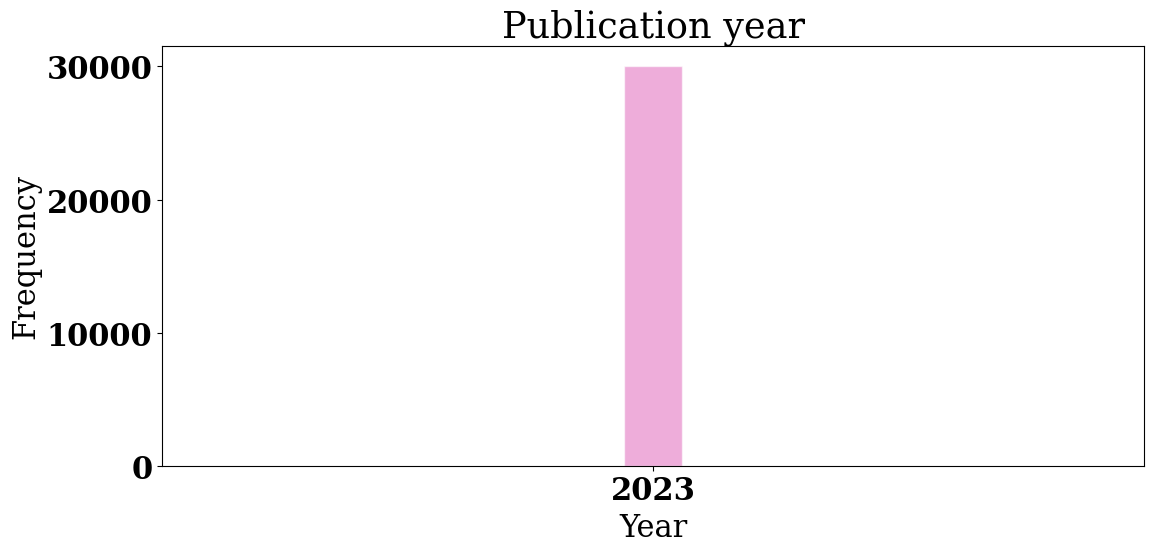

In [2146]:
fig, ax = plt.subplots()

data=article_data['publication_year'].value_counts().reset_index()

ax.bar(data['publication_year'], data['count'], width=1, alpha=0.6, edgecolor='white', label='Histogram of Data')
plt.xticks([2023], ['2023'])
plt.margins(x=8)
plt.title('Publication year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.savefig('Plots/22102023/pubyear.png')
fig

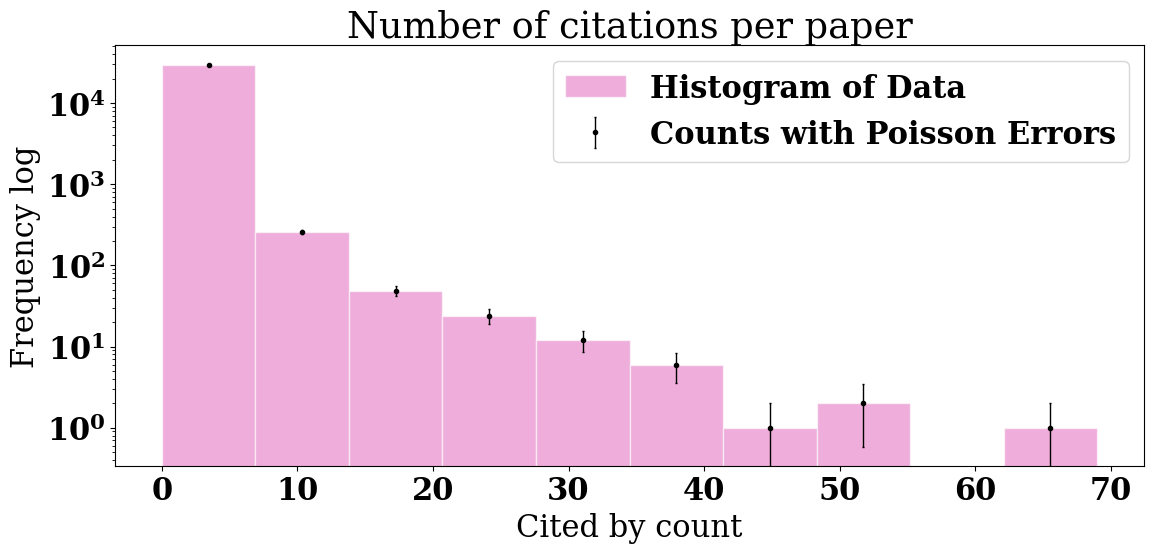

In [2623]:
fig, ax = plt.subplots()



counts, bin_edges, _ = ax.hist(article_data['cited_by_count'], log=True, alpha=0.6, edgecolor='white', label='Histogram of Data')
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
binwidth = bin_edges[1] - bin_edges[0]

# Poisson errors on the count in each bin
s_counts = np.sqrt(counts)
    
# We remove any bins, which don't have any counts in them:
x = bin_centers[counts>0]
y = counts[counts>0]
sy = s_counts[counts>0]

# Plot data with error
ax.errorbar(x, y, yerr=sy, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1, label='Counts with Poisson Errors')

plt.title('Number of citations per paper')
plt.xlabel('Cited by count')
plt.ylabel('Frequency log')

ax.legend()
plt.savefig('Plots/22102023/citecount.png')

fig

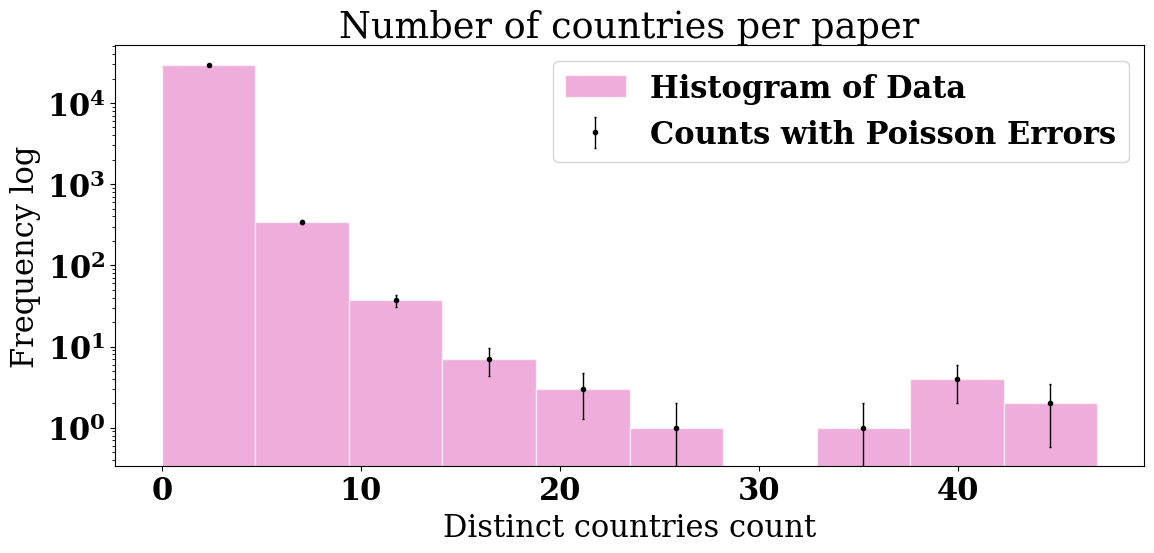

In [2148]:
fig, ax = plt.subplots()



counts, bin_edges, _ = ax.hist(article_data['countries_distinct_count'], log=True, alpha=0.6, edgecolor='white', label='Histogram of Data')
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
binwidth = bin_edges[1] - bin_edges[0]

# Poisson errors on the count in each bin
s_counts = np.sqrt(counts)
    
# We remove any bins, which don't have any counts in them:
x = bin_centers[counts>0]
y = counts[counts>0]
sy = s_counts[counts>0]

# Plot data with error
ax.errorbar(x, y, yerr=sy, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1, label='Counts with Poisson Errors')

plt.title('Number of countries per paper')
plt.xlabel('Distinct countries count')
plt.ylabel('Frequency log')

ax.legend()
plt.savefig('Plots/22102023/contrycount.png')

fig

In [2149]:
plt.figure(figsize=(10,4))
article_data['institutions_distinct_count'].value_counts().plot(kind='bar')

<Axes: xlabel='institutions_distinct_count'>

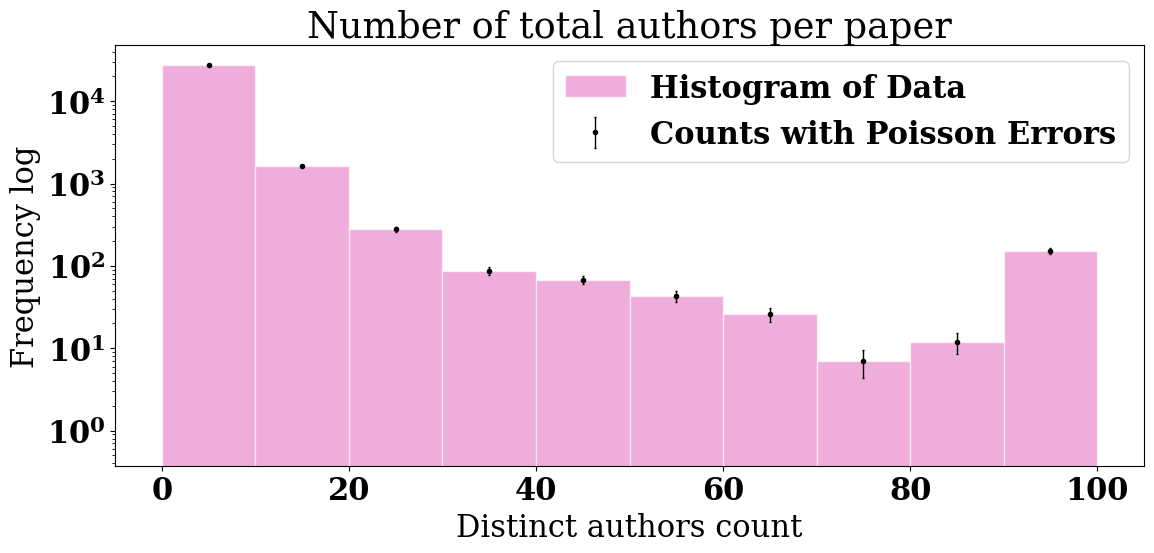

In [2150]:
fig, ax = plt.subplots()

counts, bin_edges, _ = ax.hist(article_data['total_author_counts'], log=True, alpha=0.6, edgecolor='white', label='Histogram of Data')
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
binwidth = bin_edges[1] - bin_edges[0]

# Poisson errors on the count in each bin
s_counts = np.sqrt(counts)
    
# We remove any bins, which don't have any counts in them:
x = bin_centers[counts>0]
y = counts[counts>0]
sy = s_counts[counts>0]

# Plot data with error
ax.errorbar(x, y, yerr=sy, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1, label='Counts with Poisson Errors')

plt.title('Number of total authors per paper')
plt.xlabel('Distinct authors count')
plt.ylabel('Frequency log')

ax.legend()
plt.savefig('Plots/22102023/authorscount.png')

fig

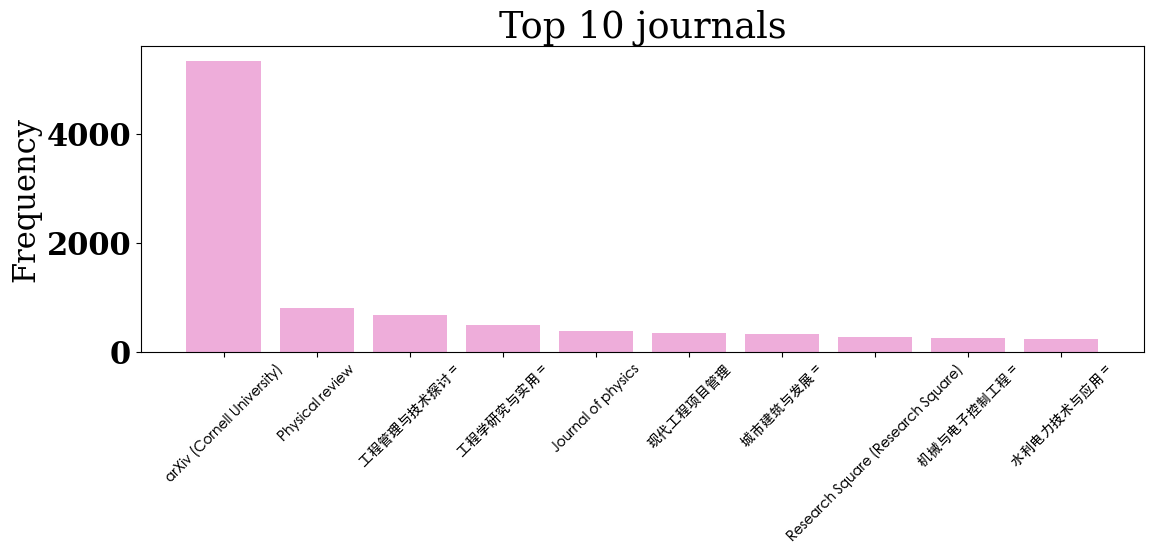

In [2152]:
fig, ax = plt.subplots()

data=article_data['journal_name'].value_counts()[0:10].reset_index()


ax.bar(data['journal_name'], data['count'], width=0.8, alpha=0.6, label='Histogram of Data')

plt.title('Top 10 journals')
#plt.xlabel('Journal')
plt.ylabel('Frequency')

plt.xticks(font='Heiti TC', rotation=45, size=10)

plt.savefig('Plots/22102023/top10journals.png')
fig

#### Author data

In [2153]:
author_data.columns

Index(['article_id', 'doi'], dtype='object')

In [1006]:
all_authors.head(3)

,author_position0,author0,institutions0,countries0,is_corresponding0,raw_author_name0,raw_affiliation_string0,raw_affiliation_strings0,00,author_position1,...,098,author_position99,author99,institutions99,countries99,is_corresponding99,raw_author_name99,raw_affiliation_string99,raw_affiliation_strings99,099
article_0,first,"{'id': 'https://openalex.org/A5010493054', 'di...","[{'id': 'https://openalex.org/I204250578', 'di...",[US],False,Jonathan L Feng,"Department of Physics and Astronomy, Universit...","[Department of Physics and Astronomy, Universi...",NaN,middle,...,NaN,middle,"{'id': 'https://openalex.org/A5087716243', 'di...","[{'id': 'https://openalex.org/I62916508', 'dis...",[DE],False,Julia Harz,"Physik Department T70, Technische Universität ...","[Physik Department T70, Technische Universität...",NaN
article_1,first,"{'id': 'https://openalex.org/A5013958581', 'di...","[{'id': 'https://openalex.org/I887846188', 'di...",[RU],False,A. Fedotov,"National Research Nuclear University MEPhI, Ka...","[National Research Nuclear University MEPhI, K...",NaN,middle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_2,first,"{'id': 'https://openalex.org/A5026698321', 'di...","[{'id': 'https://openalex.org/I4210132304', 'd...","[CN, EG]",True,Mostafa M.A. Khater,"Department of Basic Science, Obour High Instit...","[Department of Basic Science, Obour High Insti...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1008]:
all_authors_infos.head(3)

,author_id0,author_name0,author_id1,author_name1,author_id2,author_name2,author_id3,author_name3,author_id4,author_name4,...,author_id95,author_name95,author_id96,author_name96,author_id97,author_name97,author_id98,author_name98,author_id99,author_name99
article_0,https://openalex.org/A5010493054,Jonathan L. Feng,https://openalex.org/A5086121104,Felix Kling,https://openalex.org/A5081913495,Mary Hall Reno,https://openalex.org/A5009041224,Juan Rojo,https://openalex.org/A5070202914,D. Soldin,...,https://openalex.org/A5087844903,Marco Guzzi,https://openalex.org/A5057863257,A. Haas,https://openalex.org/A5082826188,Timo Hakulinen,https://openalex.org/A5055893253,Steven P. Harris,https://openalex.org/A5087716243,Julia Harz
article_1,https://openalex.org/A5013958581,A. M. Fedotov,https://openalex.org/A5012104033,Anton Ilderton,https://openalex.org/A5070854974,Felix Karbstein,https://openalex.org/A5015051661,B. King,https://openalex.org/A5052040671,D. Seipt,...,None,None,None,None,None,None,None,None,None,None
article_2,https://openalex.org/A5026698321,Mostafa M. A. Khater,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [932]:
all_authors_gender_final.head(3)

,gender_author_position_0,gender_author_position_1,gender_author_position_2,gender_author_position_3,gender_author_position_4,gender_author_position_5,gender_author_position_6,gender_author_position_7,gender_author_position_8,gender_author_position_9,...,gender_author_position_90,gender_author_position_91,gender_author_position_92,gender_author_position_93,gender_author_position_94,gender_author_position_95,gender_author_position_96,gender_author_position_97,gender_author_position_98,gender_author_position_99
article_0,male,male,mostly_female,andy,unknown,male,unknown,andy,andy,male,...,unknown,unknown,unknown,female,unknown,andy,unknown,male,male,female
article_1,unknown,andy,male,unknown,unknown,male,andy,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_2,andy,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [933]:
all_authors_first_countries_final.head(3)

,author0country0,author1country0,author2country0,author3country0,author4country0,author5country0,author6country0,author7country0,author8country0,author9country0,...,author90country0,author91country0,author92country0,author93country0,author94country0,author95country0,author96country0,author97country0,author98country0,author99country0
article_0,US,DE,US,NL,US,US,CH,US,GB,CH,...,BR,Unknown,IN,CH,DE,US,US,CH,US,DE
article_1,RU,GB,DE,GB,DE,JP,DE,None,None,None,...,None,None,None,None,None,None,None,None,None,None
article_2,CN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
#create a first author dataframe 

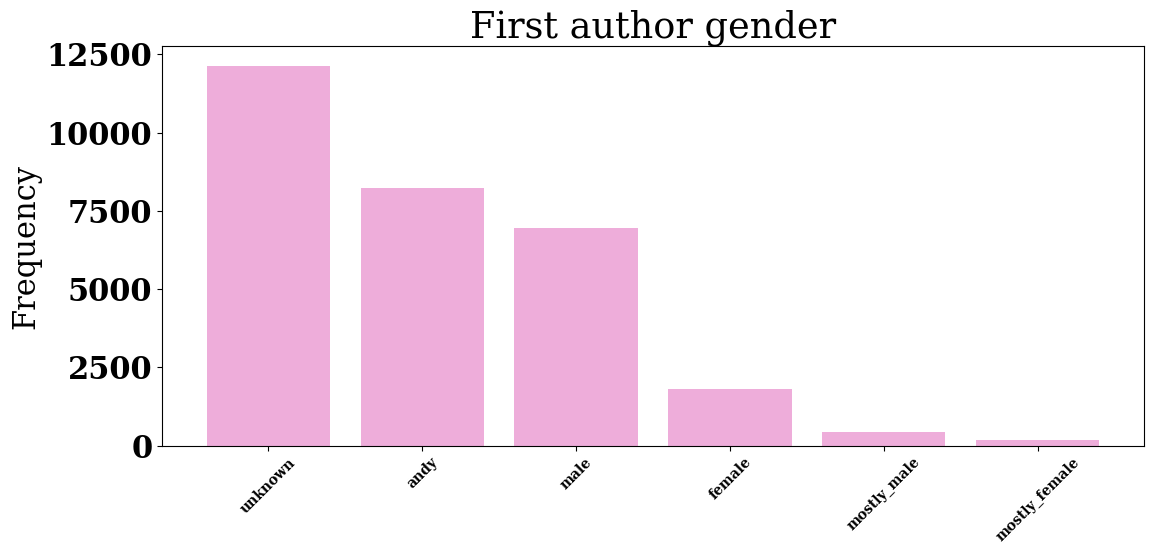

In [2154]:
fig, ax = plt.subplots()

data=all_authors_gender_final['gender_author_position_0'].value_counts().reset_index()
data=data[data['gender_author_position_0']!='None']

ax.bar(data['gender_author_position_0'], data['count'], width=0.8, alpha=0.6, label='Histogram of Data')

plt.title('First author gender')
#plt.xlabel('Journal')
plt.ylabel('Frequency')

plt.xticks(rotation=45, size=10)

plt.savefig('Plots/22102023/firstauthorgender.png')
fig

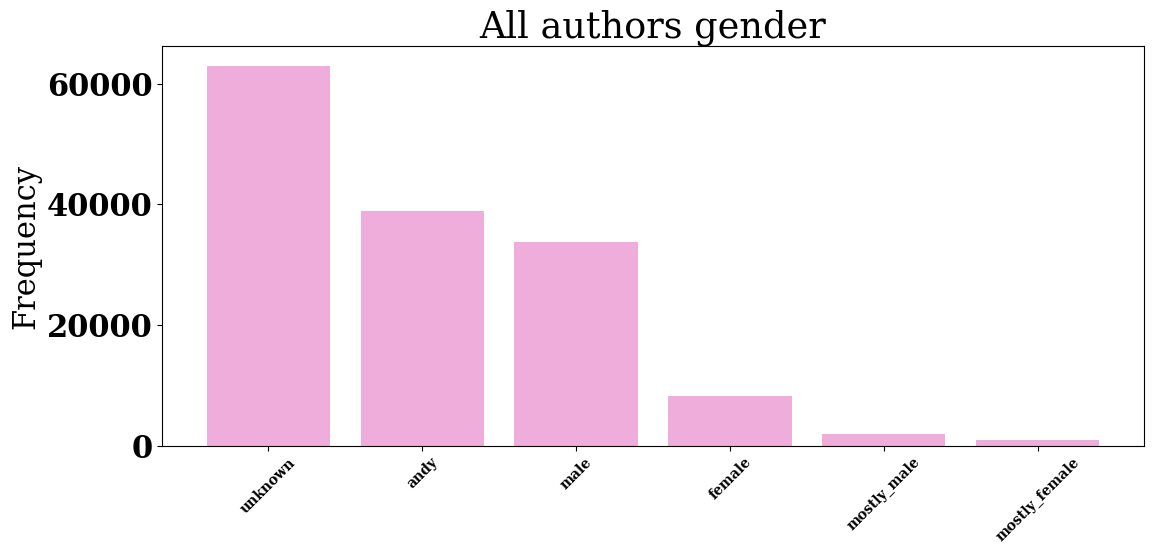

In [2171]:

fig, ax = plt.subplots()

data=all_authors_gender_article_count[['unknown','male','andy','female','mostly_female','mostly_male']].sum().reset_index()
data=data.rename(columns={"index": "gender", 0: "count"})
data=data.sort_values(by='count', ascending=False)

ax.bar(data['gender'], data['count'], width=0.8, alpha=0.6, label='Histogram of Data')

plt.title('All authors gender')
#plt.xlabel('Journal')
plt.ylabel('Frequency')
plt.xticks(rotation=45, size=10)


plt.savefig('Plots/22102023/allauthorgender.png')
fig

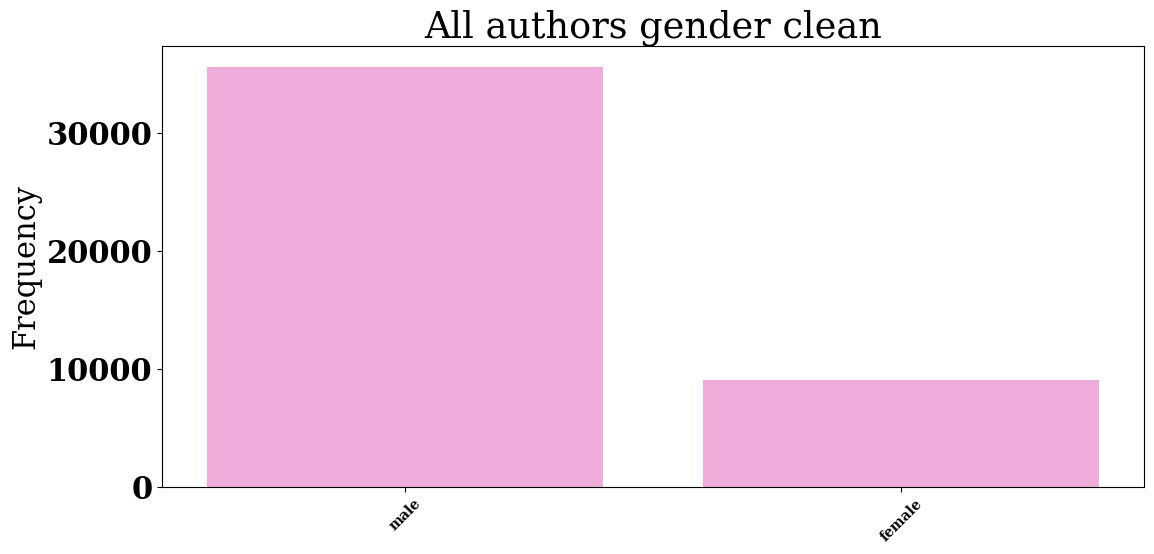

In [2209]:



fig, ax = plt.subplots()

data=all_authors_gender_article_count_clean[['male','female']].sum().reset_index()
data=data.rename(columns={"index": "gender", 0: "count"})
data=data.sort_values(by='count', ascending=False)

ax.bar(data['gender'], data['count'], width=0.8, alpha=0.6, label='Histogram of Data')

plt.title('All authors gender clean')
#plt.xlabel('Journal')
plt.ylabel('Frequency')
plt.xticks(rotation=45, size=10)


plt.savefig('Plots/24102023/allauthorgenderclean.png')
fig

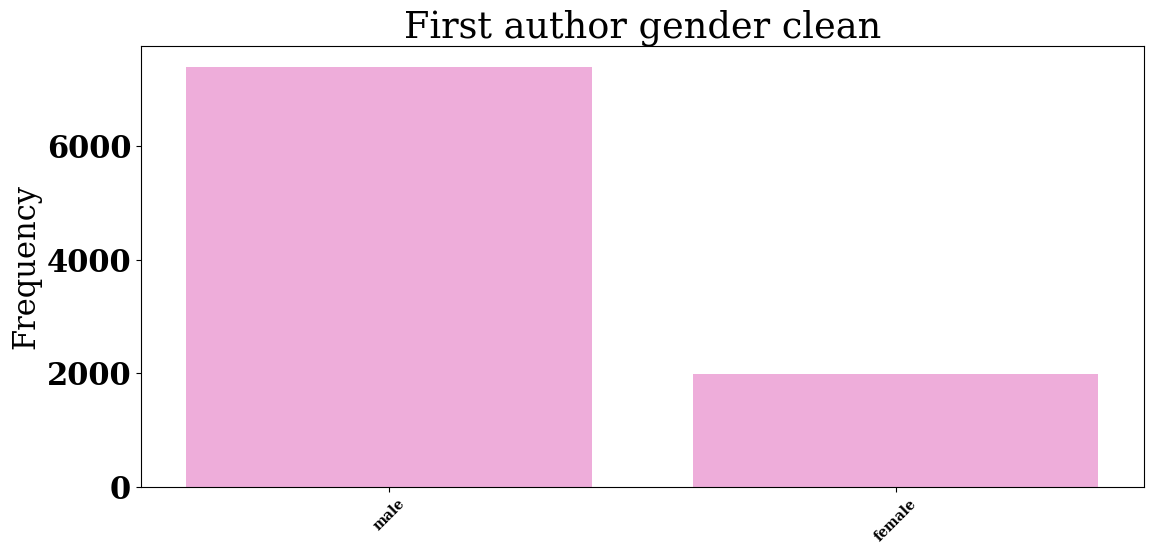

In [2213]:
fig, ax = plt.subplots()

data=all_authors_gender_final_clean['gender_author_position_0'].value_counts().reset_index()
data=data[data['gender_author_position_0']!='None']

ax.bar(data['gender_author_position_0'], data['count'], width=0.8, alpha=0.6, label='Histogram of Data')

plt.title('First author gender clean')
#plt.xlabel('Journal')
plt.ylabel('Frequency')

plt.xticks(rotation=45, size=10)

plt.savefig('Plots/24102023/firstauthorgenderclean.png')
fig

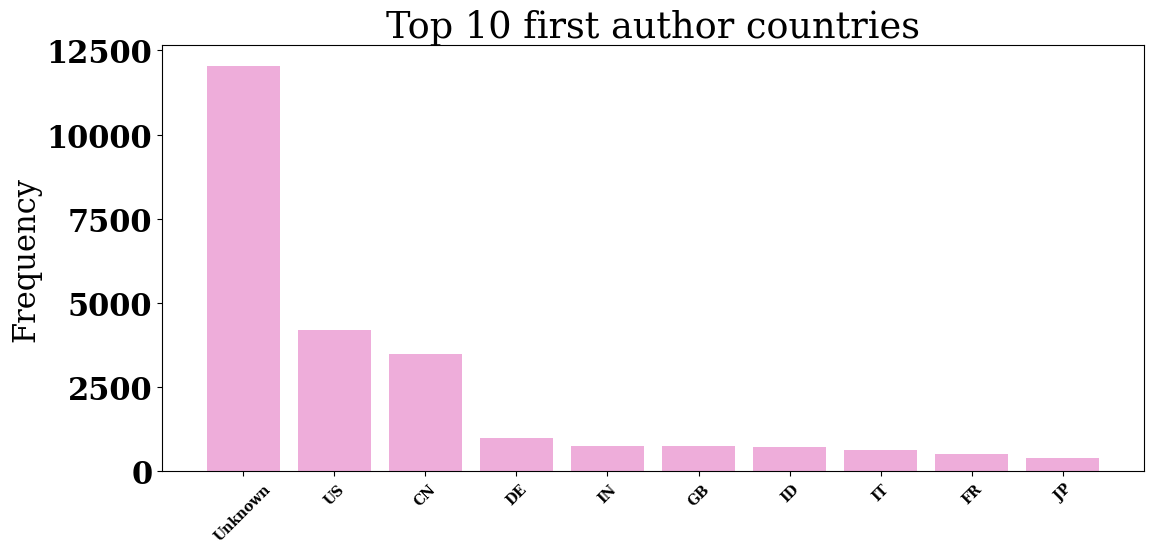

In [2157]:
fig, ax = plt.subplots()

data=all_authors_first_countries_final['author0country0'].value_counts()[0:10].reset_index()


ax.bar(data['author0country0'], data['count'], width=0.8, alpha=0.6, label='Histogram of Data')

plt.title('Top 10 first author countries')
#plt.xlabel('Journal')
plt.ylabel('Frequency')

plt.xticks(rotation=45, size=10)

plt.savefig('Plots/22102023/firstauthorcountry.png')
fig

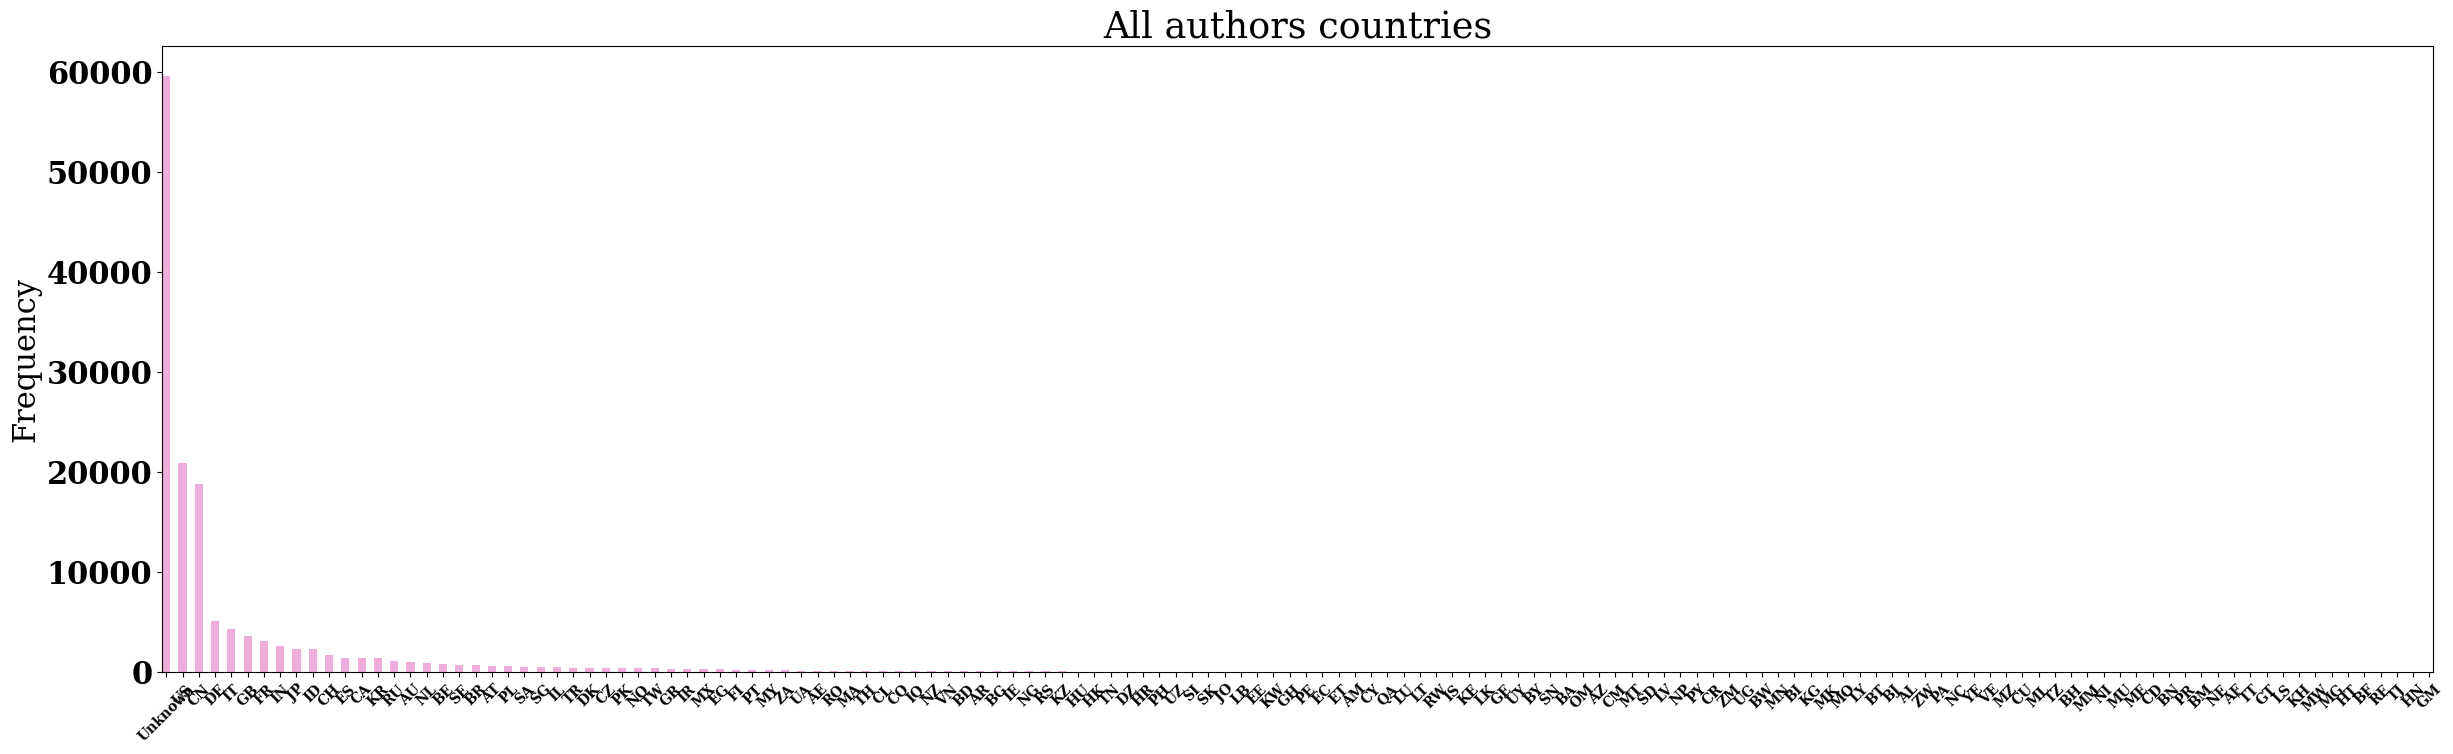

In [2178]:
fig, ax = plt.subplots(figsize=(25,8))

data=all_authors_first_countries_article_count.sum().sort_values(ascending=False)[1::].reset_index()
data=data.rename(columns={"index": "country", 0: "count"})

ax.bar(data['country'], data['count'], width=0.5, alpha=0.6, label='Histogram of Data')

plt.title('All authors countries')
#plt.xlabel('Journal')
plt.ylabel('Frequency')

plt.xticks(rotation=45, size=10)
plt.margins(x=0)

plt.savefig('Plots/22102023/allauthorcountry.png')
fig

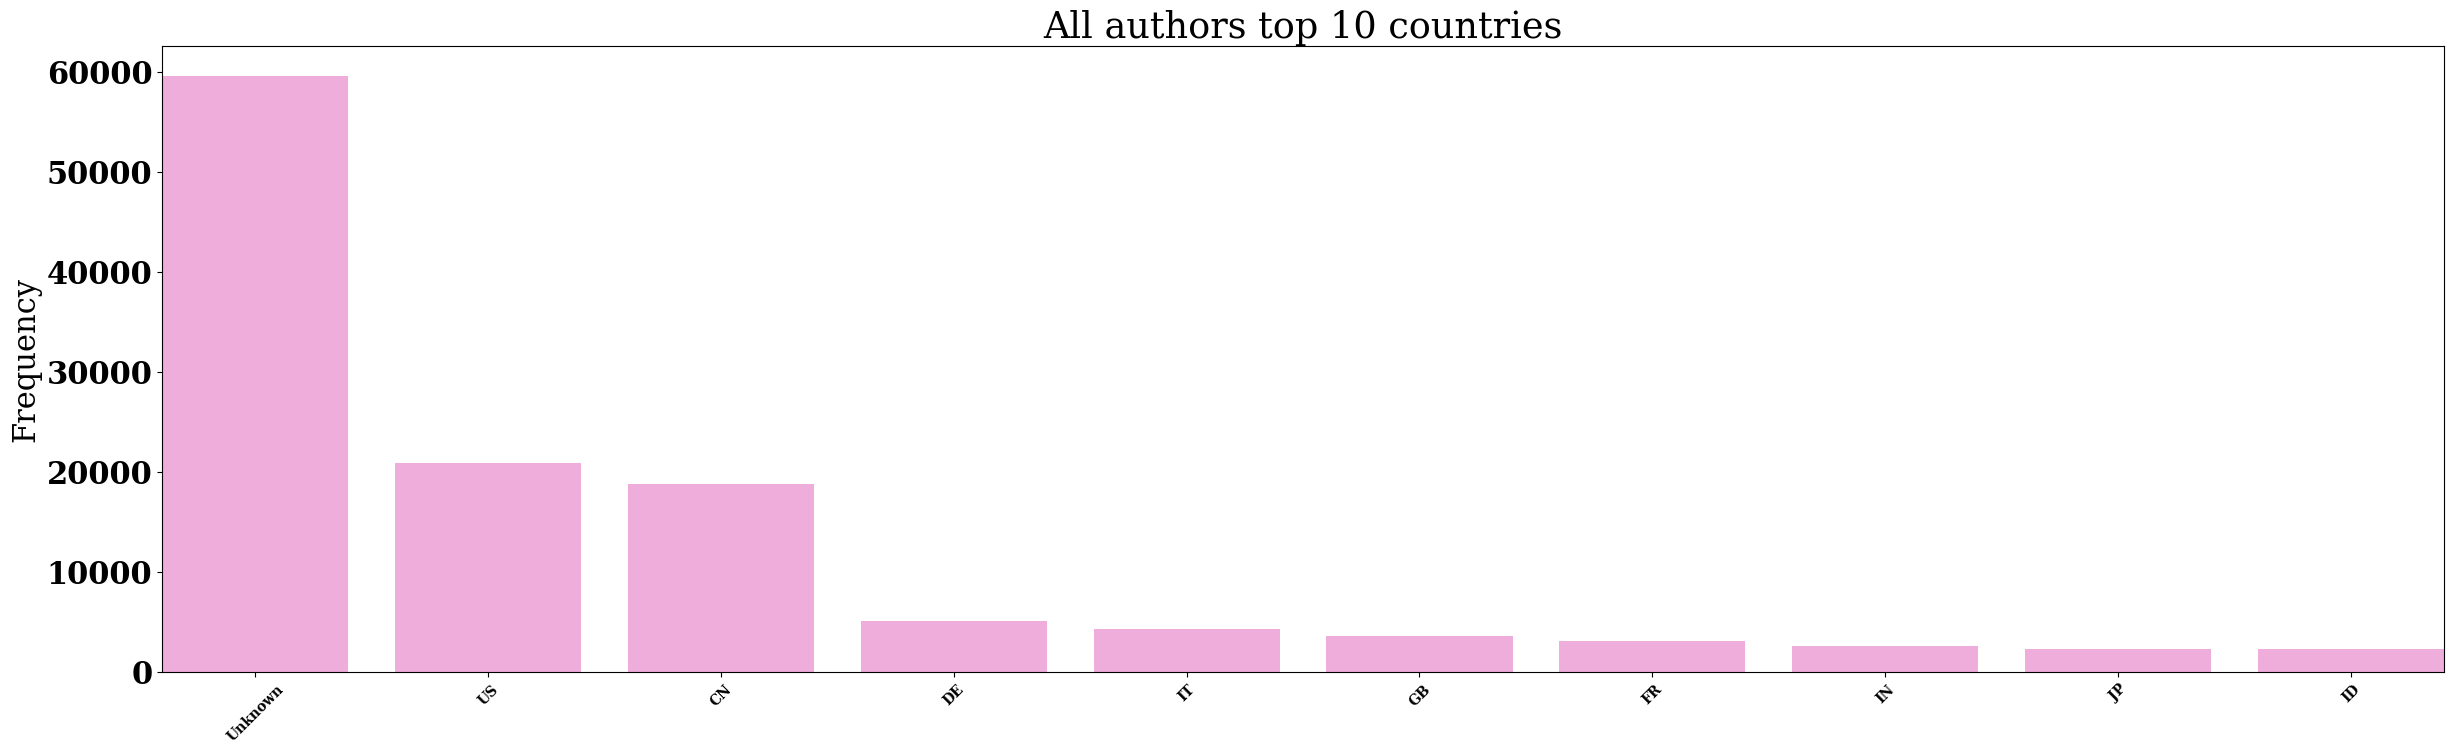

In [2180]:
fig, ax = plt.subplots(figsize=(25,8))

data=all_authors_first_countries_article_count.sum().sort_values(ascending=False)[1::].reset_index()
data=data.rename(columns={"index": "country", 0: "count"})
data=data[0:10]

ax.bar(data['country'], data['count'], width=0.8, alpha=0.6, label='Histogram of Data')

plt.title('All authors top 10 countries')
#plt.xlabel('Journal')
plt.ylabel('Frequency')

plt.xticks(rotation=45, size=10)
plt.margins(x=0)

plt.savefig('Plots/22102023/allauthor10country.png')
fig

In [2159]:
all_authors_infos['author_id0'].value_counts()[1:11].plot(kind='bar')
plt.title('Top 10 appearing first authors')

Text(0.5, 1.0, 'Top 10 appearing first authors')

In [2160]:
author0_id_gender=all_authors_infos['author_id0'].reset_index().merge(all_authors_gender_final['gender_author_position_0'].reset_index(), on='index')


In [2161]:
author0_id_gender_count=author0_id_gender.merge(author0_id_gender['author_id0'].value_counts().reset_index()[1:11], on='author_id0')

In [2162]:
top10authorgender=author0_id_gender_count.drop_duplicates(subset=['author_id0'])


In [2163]:
top10authorgender=top10authorgender.sort_values(by='count', ascending=False)

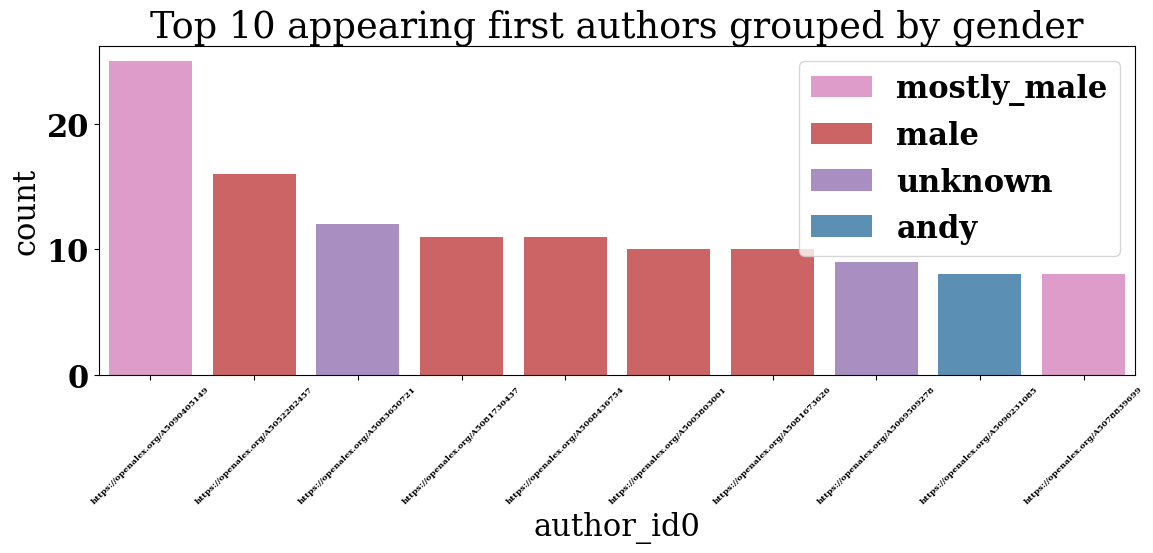

In [2174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots()

ax = sns.barplot(x='author_id0', y='count', data=top10authorgender, hue=top10authorgender['gender_author_position_0'], alpha=0.8)
plt.title('Top 10 appearing first authors grouped by gender')
plt.xticks(size=6, rotation=45)
ax.legend()
plt.savefig('Plots/22102023/10firstauthorgender.png')
fig

In [2166]:
gender_citation=all_authors_gender_final.join(article_data['cited_by_count'])
first_author_gender_citation=gender_citation[['gender_author_position_0', 'cited_by_count']]
result_first_author_gender_citation = first_author_gender_citation.groupby('gender_author_position_0')['cited_by_count'].mean().reset_index().sort_values(by='cited_by_count', ascending=False)
result_first_author_gender_citation=result_first_author_gender_citation[result_first_author_gender_citation['gender_author_position_0']!='None']


In [2167]:
labels=result_first_author_gender_citation['gender_author_position_0'].values

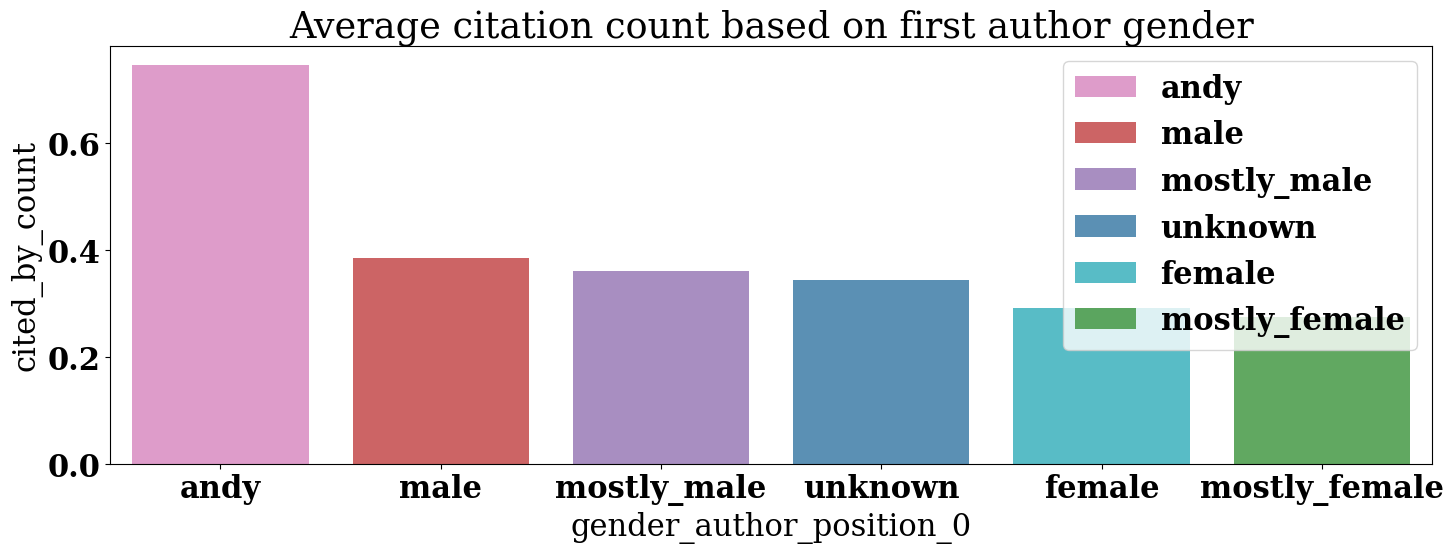

In [2175]:
#plotting parameters

fig, ax = plt.subplots(figsize=(15,6))

ax = sns.barplot(x='gender_author_position_0', y='cited_by_count', data=result_first_author_gender_citation, hue=result_first_author_gender_citation['gender_author_position_0'], legend=True, alpha=0.8)
ax.legend(loc='upper right')
plt.title('Average citation count based on first author gender')

plt.xticks(rotation=0)
plt.savefig('Plots/22102023/gendercite.png')
fig

In [2169]:
#create 2D histogram of gender dist between each article 
x=all_authors_gender_article_count['male']+all_authors_gender_article_count['mostly_male']
y=all_authors_gender_article_count['female']+all_authors_gender_article_count['mostly_female']


In [2114]:
#remove zeros 
#x=x[x>0]
#y=y[y>0]

In [2115]:
x.describe()

count    30071.000000
mean         1.182568
std          2.335750
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         74.000000
dtype: float64

In [2116]:
y.describe()

count    30071.000000
mean         0.302717
std          0.900493
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
dtype: float64

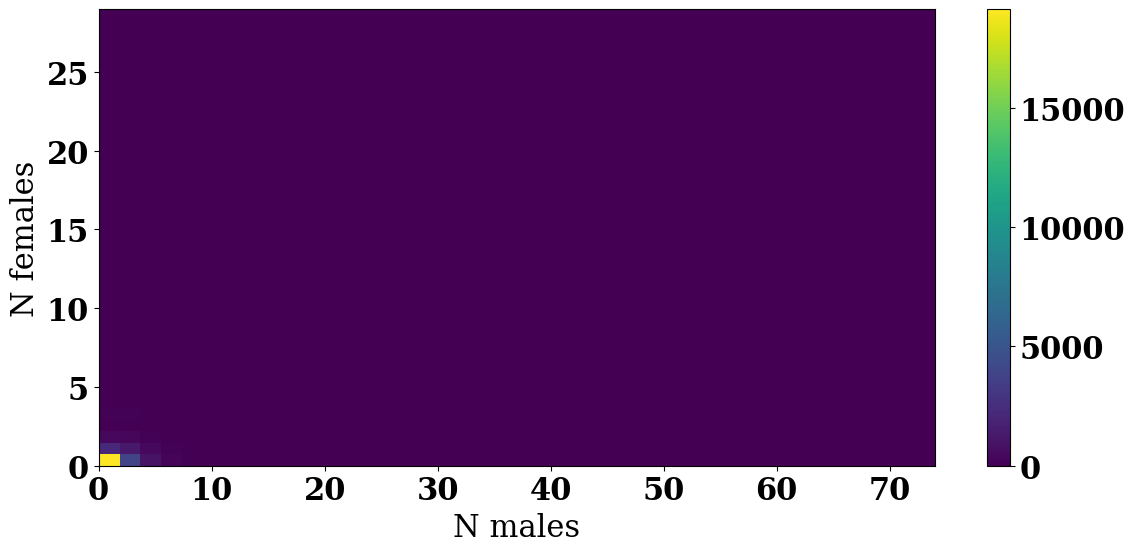

In [2118]:
plt.hist2d(x, y, bins=40)
#plt.xlim(0,5)
#plt.ylim(0,5)
plt.colorbar()
plt.xlabel('N males')
plt.ylabel('N females')
plt.savefig('Plots/22102023/gender2dhist.png')
plt.show()


In [2119]:
H, yedges, xedges = np.histogram2d(y, x, bins=40)


/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_4107/2332319154.py:4: RuntimeWarning:

divide by zero encountered in log

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_4107/2332319154.py:14: RuntimeWarning:

divide by zero encountered in log



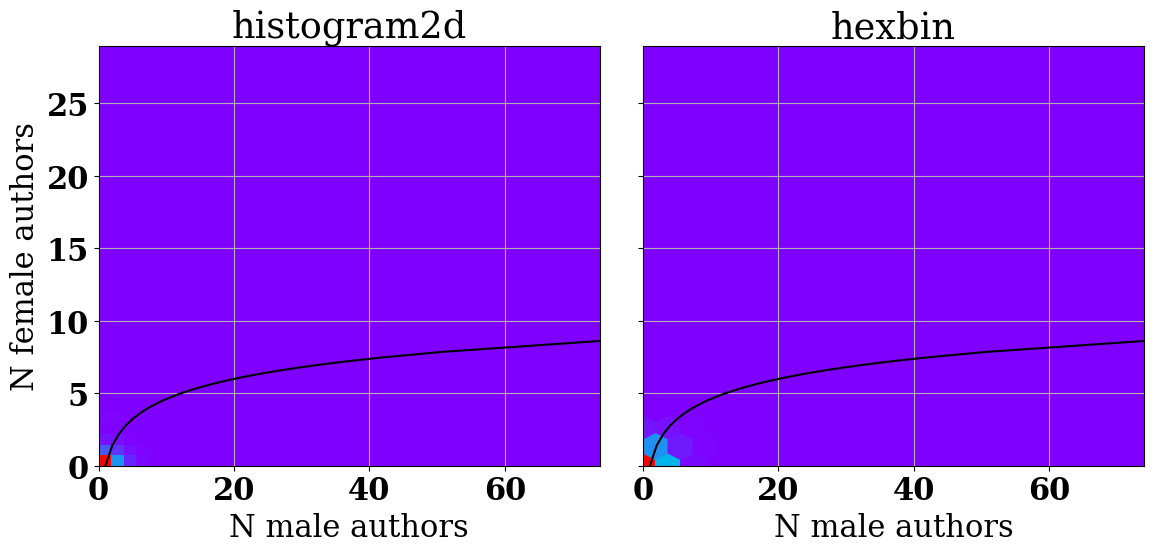

In [2120]:
# Plot histogram using pcolormesh
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.pcolormesh(xedges, yedges, H, cmap='rainbow')
ax1.plot(sorted(x), 2*np.log(sorted(x)), 'k-')
ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax1.set_xlabel('N male authors')
ax1.set_ylabel('N female authors')
ax1.set_title('histogram2d')
ax1.grid()

# Create hexbin plot for comparison
ax2.hexbin(x, y, gridsize=20, cmap='rainbow')
ax2.plot(sorted(x), 2*np.log(sorted(x)), 'k-')
ax2.set_title('hexbin')
ax2.set_xlim(x.min(), x.max())
ax2.set_xlabel('N male authors')
ax2.grid()

plt.show()


In [2121]:
#plot country

In [2122]:
df_country=all_authors_first_countries_article_countsum

In [2123]:
# generate country code  based on country name 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(alpha_2=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df_country['CODE']=alpha3code(df_country.contrycode2)
df_country.head()

,contrycode2,countrycount,CODE
0,US,20948.0,USA
1,CH,1773.0,CHE
2,DE,5174.0,DEU
3,GB,3688.0,GBR
4,IT,4376.0,ITA


In [2124]:
df_country=df_country[df_country['CODE']!='None']

In [2125]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']


In [2126]:
world[world['name']=='France']

,pop_est,continent,name,CODE,gdp_md_est,geometry
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."


In [2127]:
# then merge with our data 
merge=pd.merge(world,df_country,on='CODE')

In [2128]:
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
#let's update this to be our own location list 
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
location

,name,latitude,longitude
0,Afghanistan,33.939110,67.709953
1,Albania,41.153332,20.168331
2,Algeria,28.033886,1.659626
3,Angola,-11.202692,17.873887
4,Argentina,-38.416097,-63.616672
...,...,...,...
153,Vietnam,14.058324,108.277199
154,W. Sahara,24.215527,-12.885834
155,Yemen,15.552727,48.516388
156,Zambia,-13.133897,27.849332


In [2129]:
#we need to find countries that are not on list that are in our data!! like France: 
location[location['name']=='France']
#let's create our own dataset with name, latitude and longitude of the countries that are in or data ie df country 

,name,latitude,longitude


In [2130]:
merge=merge.merge(location,on='name', how='outer').sort_values(by='countrycount',ascending=False).reset_index()

In [2131]:
#merge[merge['latitude'].isna()]

In [2132]:
#update location with countries for the missing latitude/longitude 

In [2133]:
# Data for the rows to add
new_country_data = {
    'name': ['France', 'Norway', 'North Macedonia', 'New Caledonia', 'Myanmar', 'Puerto Rico', 'Lesotho'],
    'latitude': [46.603354, 60.472024, 41.6086, -20.904305, 21.9162, 18.2208, -29.609988],
    'longitude': [1.888334, 8.468946, 21.7453, 165.618042, 95.9560, -66.5901, 28.233608]
}

# Create a new DataFrame with the rows to add
new_rows_df = pd.DataFrame(new_country_data)

# Use the concat function to add the new rows to the existing DataFrame
location = pd.concat([location, new_rows_df], ignore_index=True)

# Display the updated DataFrame
location

,name,latitude,longitude
0,Afghanistan,33.939110,67.709953
1,Albania,41.153332,20.168331
2,Algeria,28.033886,1.659626
3,Angola,-11.202692,17.873887
4,Argentina,-38.416097,-63.616672
...,...,...,...
160,North Macedonia,41.608600,21.745300
161,New Caledonia,-20.904305,165.618042
162,Myanmar,21.916200,95.956000
163,Puerto Rico,18.220800,-66.590100


In [2134]:
merge=merge.merge(location,on='name').sort_values(by='countrycount',ascending=False).reset_index()

In [2135]:
base=world.plot(color='k', figsize=(25, 20))

In [2136]:
mergeworld = pd.merge(merge, world, how="outer")


In [2137]:
mergeworld[mergeworld['name']=='France']

,level_0,index,pop_est,continent,name,CODE,gdp_md_est,geometry,contrycode2,countrycount,latitude_x,longitude_x,latitude_y,longitude_y
5,5.0,27.0,67059887.0,Europe,France,FRA,2715518.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",FR,3132.0,NaN,NaN,46.603354,1.888334


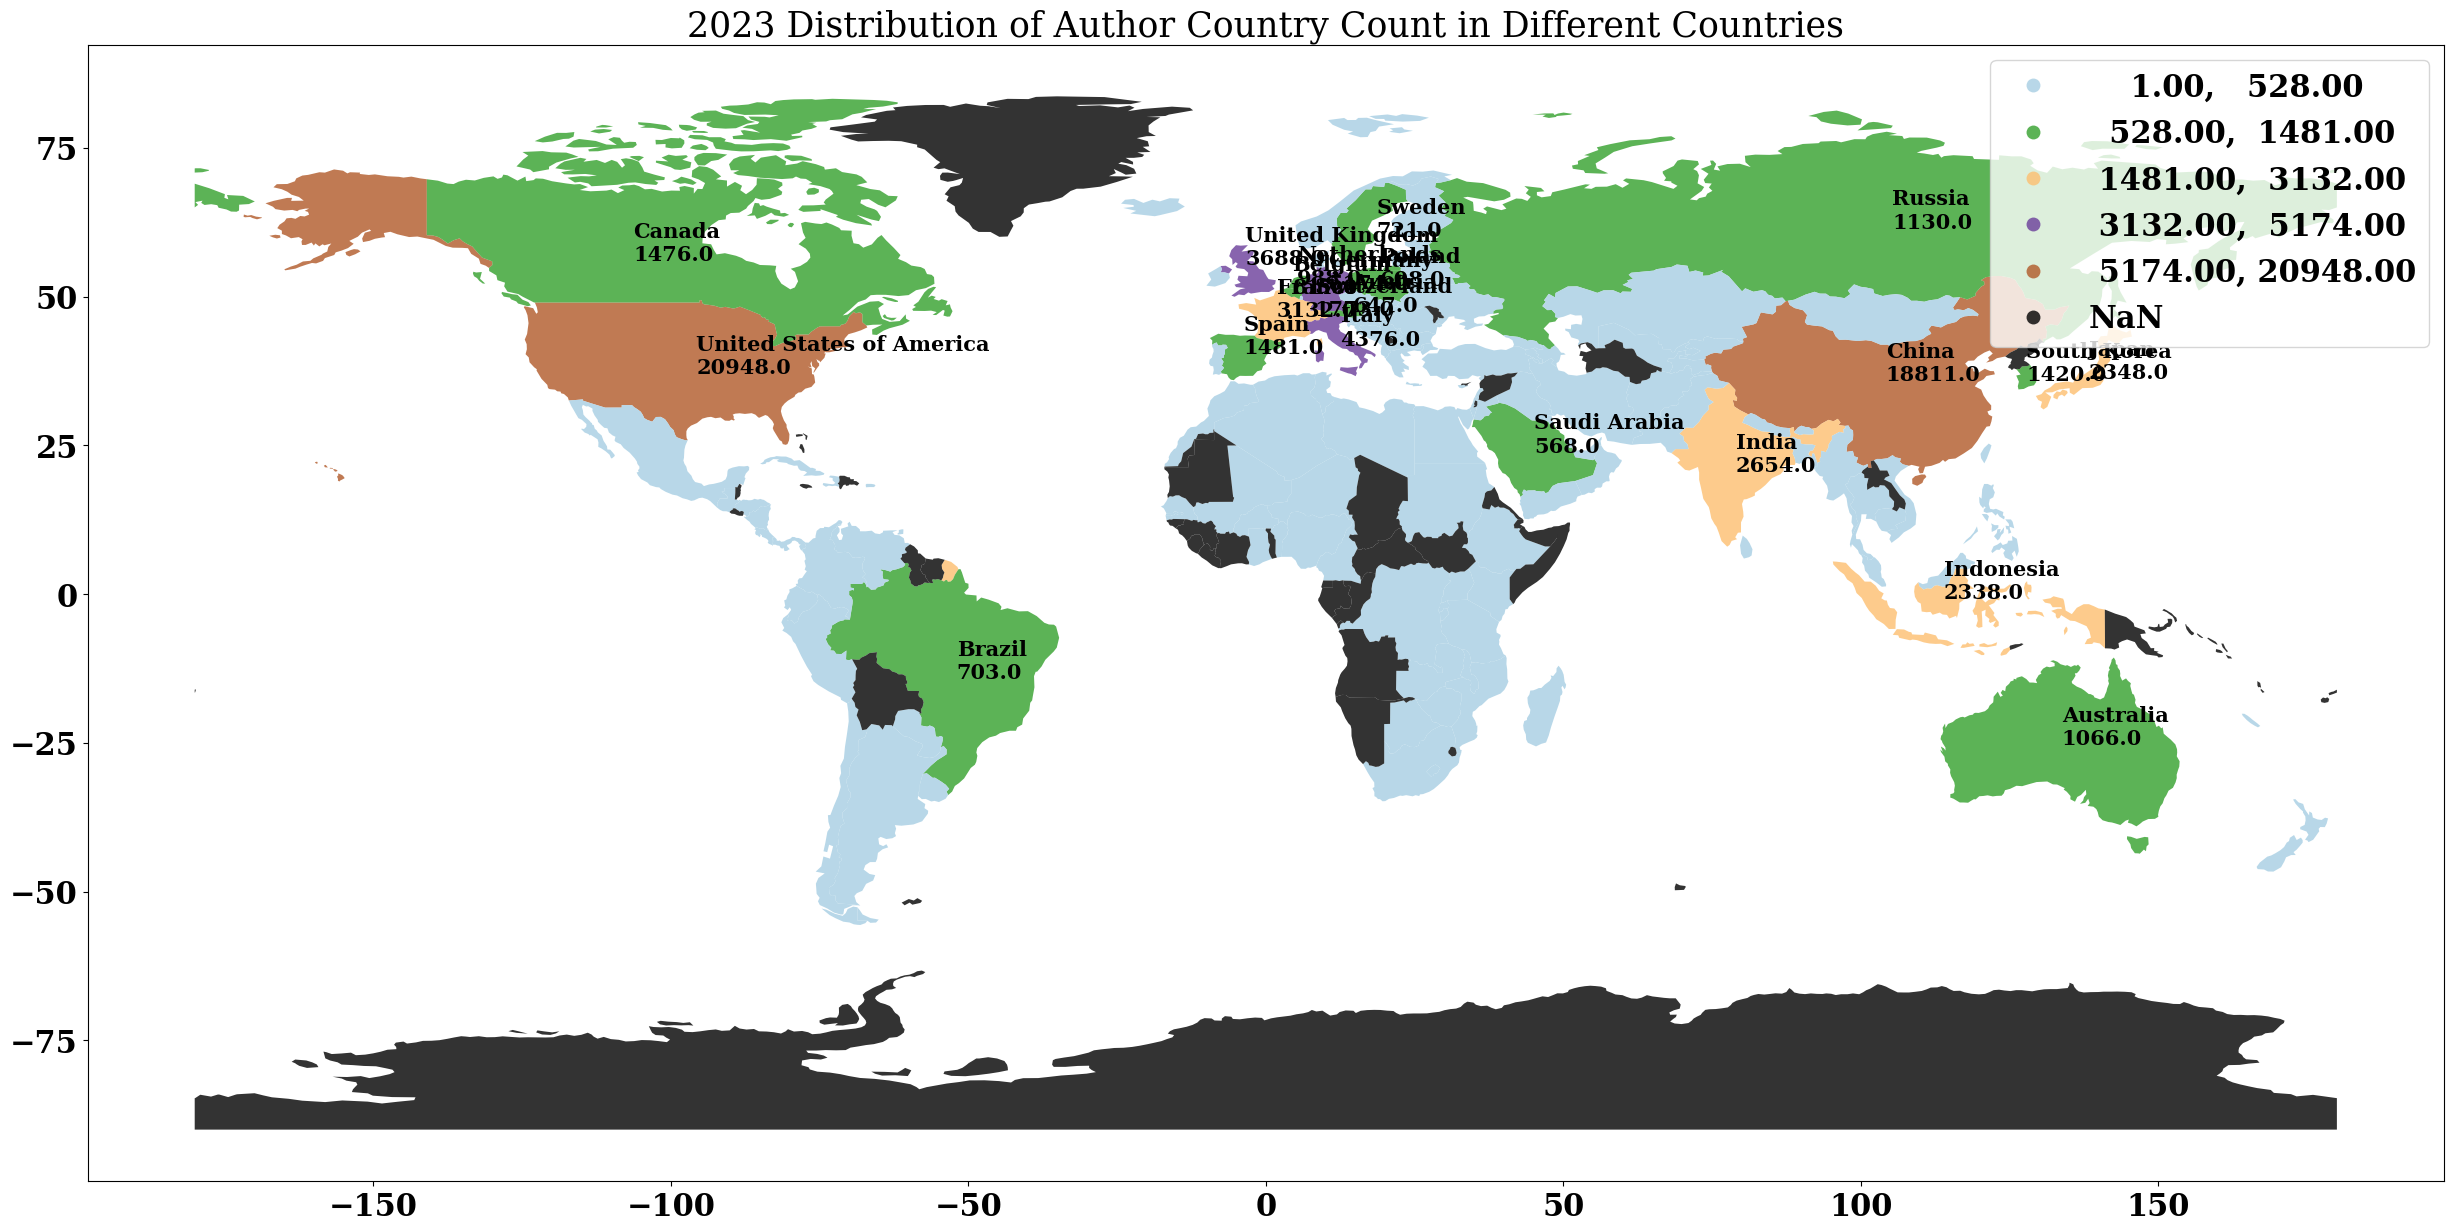

In [2177]:
allauthors=mergeworld.plot(column='countrycount',
                scheme='natural_breaks',
                cmap='Paired', 
                alpha=0.8,
                figsize=(25, 20),
                missing_kwds={'color': 'k', 'alpha':0.8}, 
                legend=True);

plt.title('2023 Distribution of Author Country Count in Different Countries',fontsize=25)
# add countries names and numbers for top 10 appearing countries 
for i in range(len(mergeworld[mergeworld['countrycount']>528])):
    plt.text(float(mergeworld.longitude_y[i]),float(mergeworld.latitude_y[i]),"{}\n{}".format(mergeworld.name[i],mergeworld.countrycount[i]),size=15)
plt.savefig('Plots/22102023/authorcountrymap.png')
plt.show()


In [1266]:
#do the same but for first author 
first_author_country=all_authors_first_countries_final['author0country0'].value_counts().reset_index()
first_author_country.columns=['contrycode2', 'countrycount']

In [1267]:
df_first_author_country=first_author_country

In [1268]:
# generate country code  based on country name 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(alpha_2=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df_first_author_country['CODE']=alpha3code(df_first_author_country.contrycode2)
df_first_author_country.head()

,contrycode2,countrycount,CODE
0,Unknown,12048,None
1,US,4194,USA
2,CN,3478,CHN
3,DE,980,DEU
4,IN,764,IND


In [1269]:
df_first_author_country=df_first_author_country[df_first_author_country['CODE']!='None']

In [1270]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']


In [1271]:
# then merge with our data 
mergefirst=pd.merge(world,df_first_author_country,on='CODE')
merge

,index,pop_est,continent,name,CODE,gdp_md_est,geometry,contrycode2,countrycount,latitude,longitude
0,2,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,20948.0,37.090240,-95.712891
1,94,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",CN,18811.0,35.861660,104.195397
2,78,8.313280e+07,Europe,Germany,DEU,3861123,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",DE,5174.0,51.165691,10.451526
3,96,6.029740e+07,Europe,Italy,ITA,2003576,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",IT,4376.0,41.871940,12.567380
4,98,6.683440e+07,Europe,United Kingdom,GBR,2829108,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",GB,3688.0,55.378051,-3.435973
...,...,...,...,...,...,...,...,...,...,...,...
119,22,9.746117e+06,North America,Honduras,HND,25095,"POLYGON ((-83.14722 14.99583, -83.48999 15.016...",HN,1.0,15.199999,-86.241905
120,44,2.347706e+06,Africa,Gambia,GMB,1826,"POLYGON ((-16.71373 13.59496, -15.62460 13.623...",GM,1.0,13.443182,-15.310139
121,11,1.126308e+07,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169...",HT,1.0,18.971187,-72.285215
122,53,1.648654e+07,Asia,Cambodia,KHM,27089,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",KH,1.0,12.565679,104.990963


In [1272]:
mergefirst=mergefirst.merge(location,on='name').sort_values(by='countrycount',ascending=False).reset_index()

In [1331]:
firstmergeworld = pd.merge(mergefirst, world, how="outer")


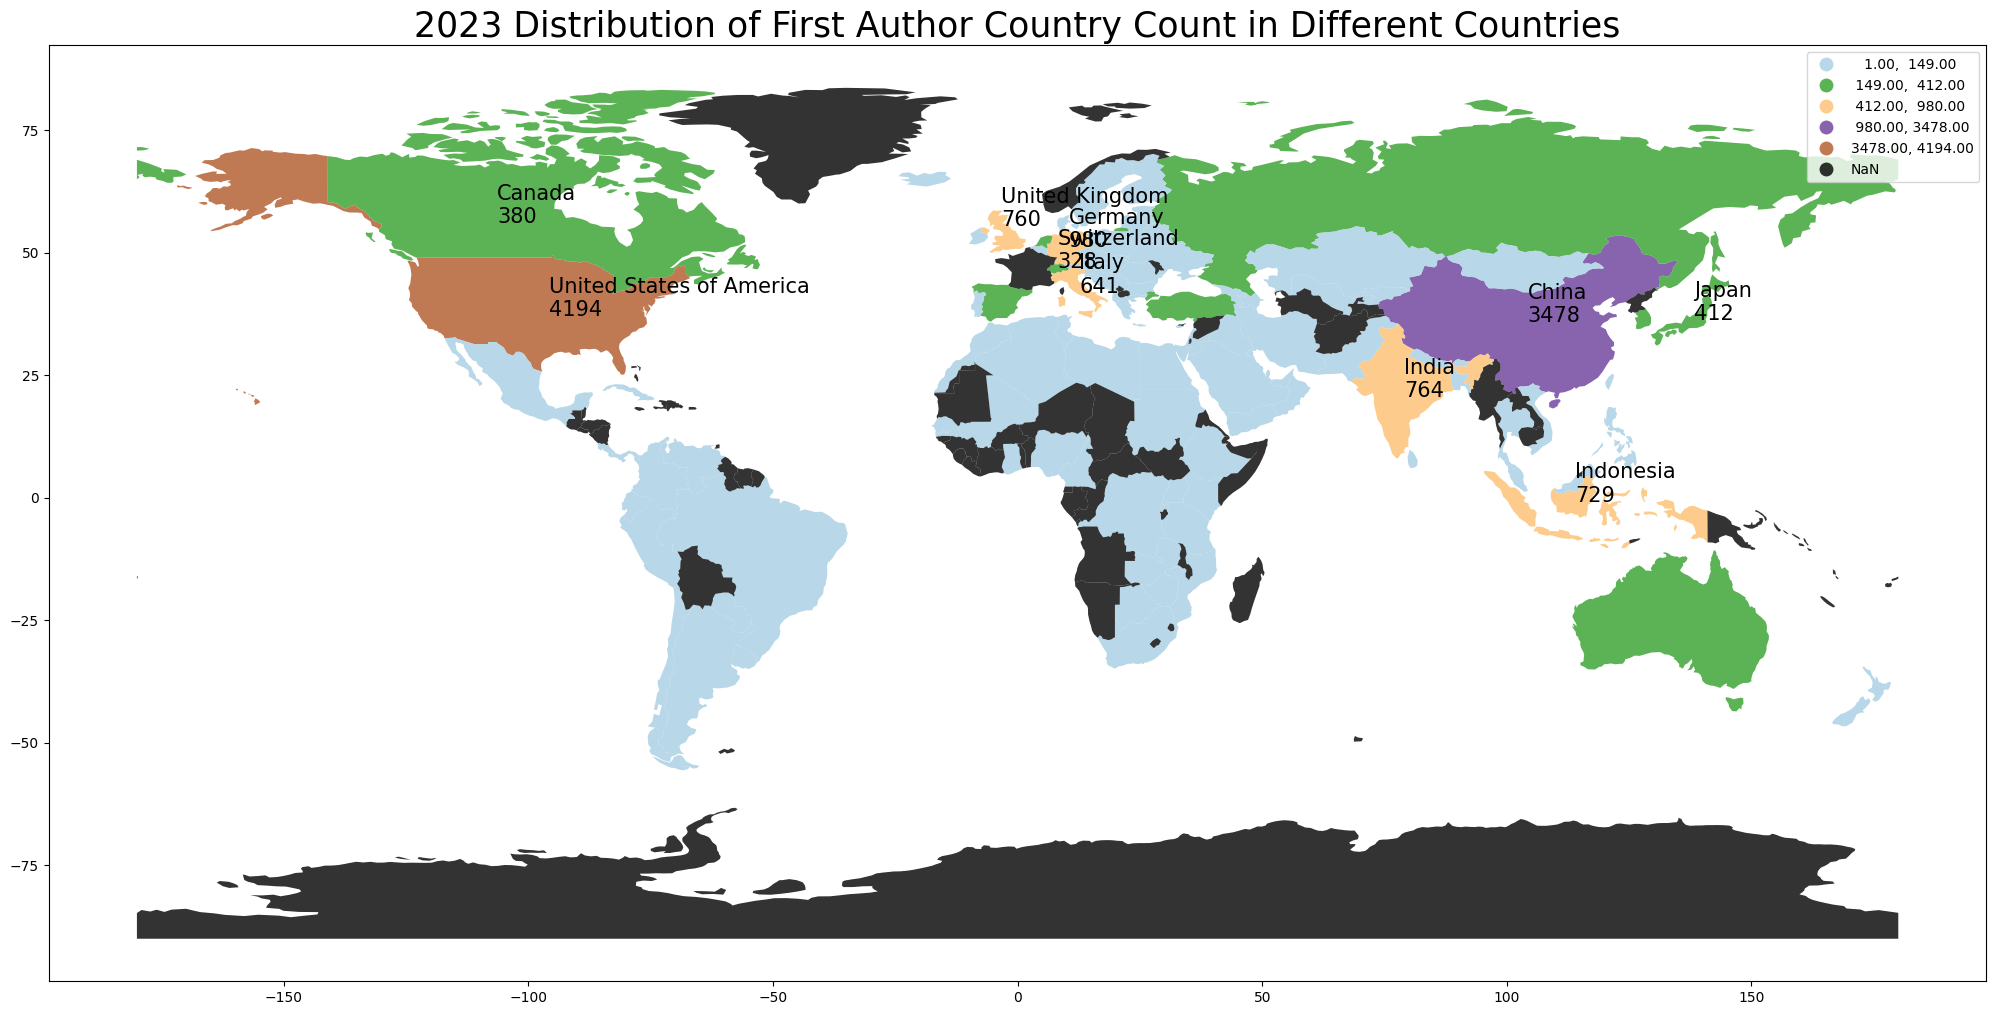

In [1366]:
firstmergeworld.plot(column='countrycount',
                scheme='natural_breaks',
                cmap='Paired', alpha=0.8,
                figsize=(25, 20),
                missing_kwds={'color': 'k', 'alpha': 0.8}, 
                legend=True);

plt.title('2023 Distribution of First Author Country Count in Different Countries',fontsize=25)
# add countries names and numbers for top 10 appearing countries 
for i in range(0,10):
    plt.text(float(mergefirst.longitude[i]),float(mergefirst.latitude[i]),"{}\n{}".format(mergefirst.name[i],mergefirst.countrycount[i]),size=15)
plt.show()

In [ ]:
#maybe find a good way to show the wholde world, all authors representation AND first author representation on one map 

In [2616]:
#plot topic distributions 
topics_tfidf_max_scores.columns

Index(['topic_index', 'topic_words', 'topic_name', 'topic_max_score',
       'article_index'],
      dtype='object')

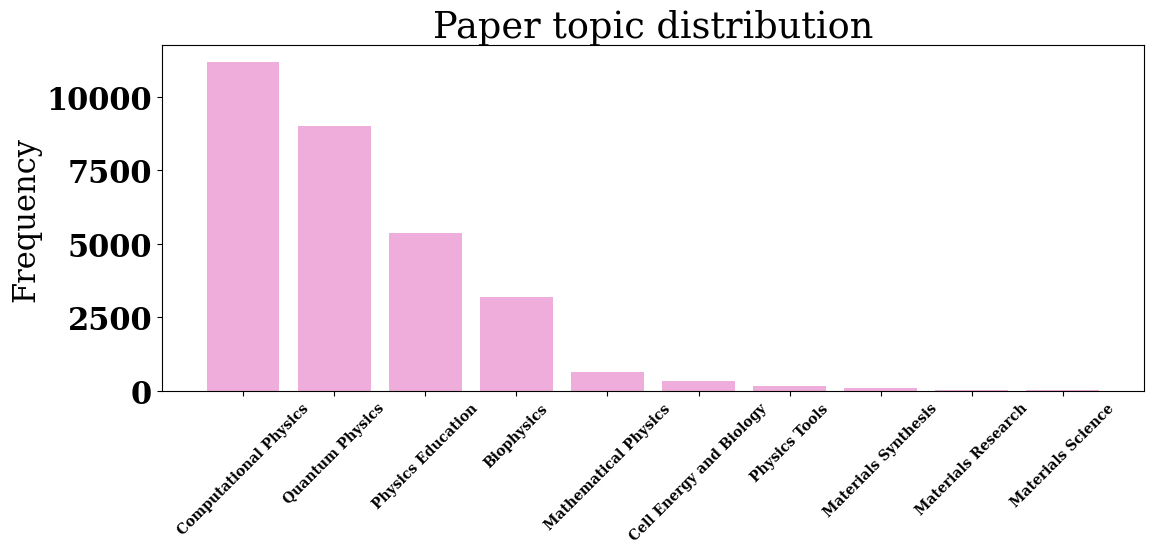

In [2618]:
fig, ax = plt.subplots()

data=topics_tfidf_max_scores['topic_name'].value_counts().reset_index()


ax.bar(data['topic_name'], data['count'], width=0.8, alpha=0.6, label='Histogram of Data')

plt.title('Paper topic distribution')
#plt.xlabel('Journal')
plt.ylabel('Frequency')

plt.xticks(rotation=45, size=10)

plt.savefig('Plots/24102023/topicnamedist.png')
fig

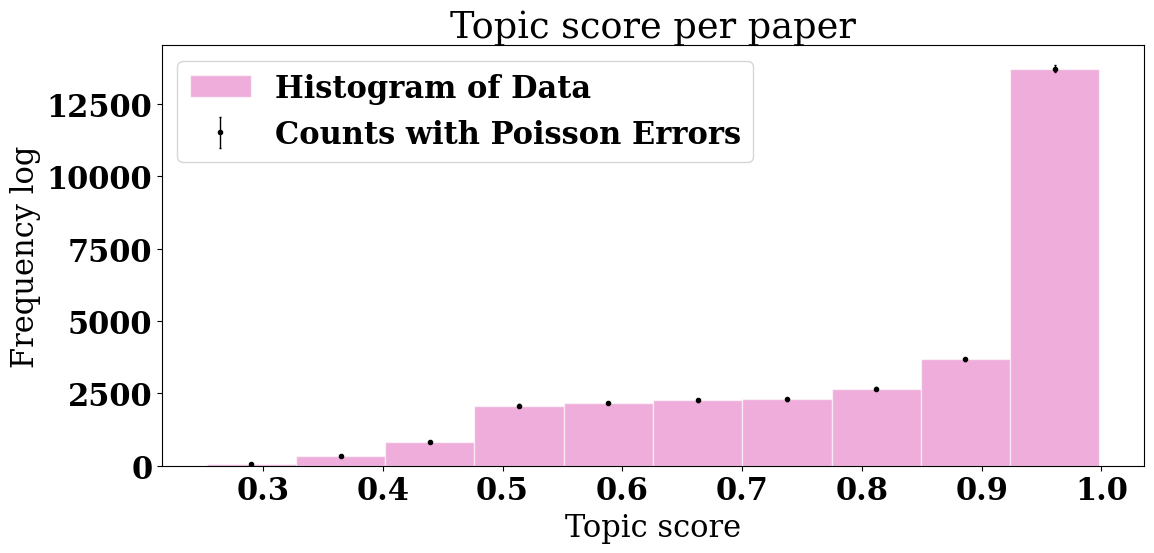

In [2622]:
fig, ax = plt.subplots()


counts, bin_edges, _ = ax.hist(topics_tfidf_max_scores['topic_max_score'], log=False, alpha=0.6, edgecolor='white', label='Histogram of Data')
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
binwidth = bin_edges[1] - bin_edges[0]

# Poisson errors on the count in each bin
s_counts = np.sqrt(counts)
    
# We remove any bins, which don't have any counts in them:
x = bin_centers[counts>0]
y = counts[counts>0]
sy = s_counts[counts>0]

# Plot data with error
ax.errorbar(x, y, yerr=sy, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1, label='Counts with Poisson Errors')

plt.title('Topic score per paper')
plt.xlabel('Topic score')
plt.ylabel('Frequency log')

ax.legend()
plt.savefig('Plots/24102023/topicscore.png')

fig